In [15]:
import joblib
import warnings
import numpy as np
import pandas as pd
import utils.plot as custom_plt
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from IPython.core.interactiveshell import InteractiveShell

In [16]:
plt.rc('font', family='GULIM')
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

In [17]:
df = pd.read_csv('Database/rainfall_train.csv', index_col=0)
df_test = pd.read_csv('Database/rainfall_test.csv', index_col=0)

In [18]:
mask = df['rainfall_train.class_interval'] == -999
df = df[~mask]

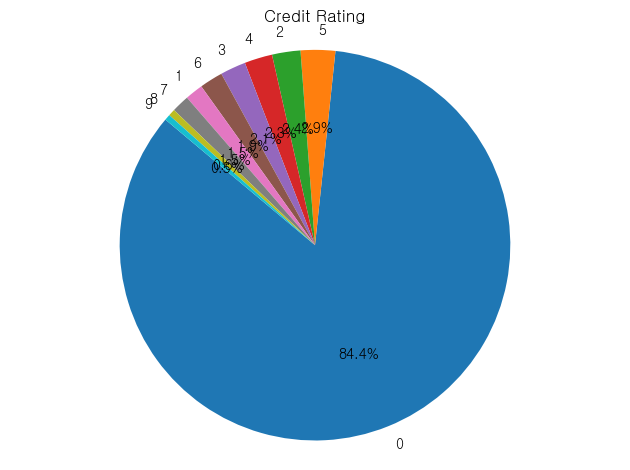

In [19]:
custom_plt.plot_imabalance(df, 'rainfall_train.class_interval')

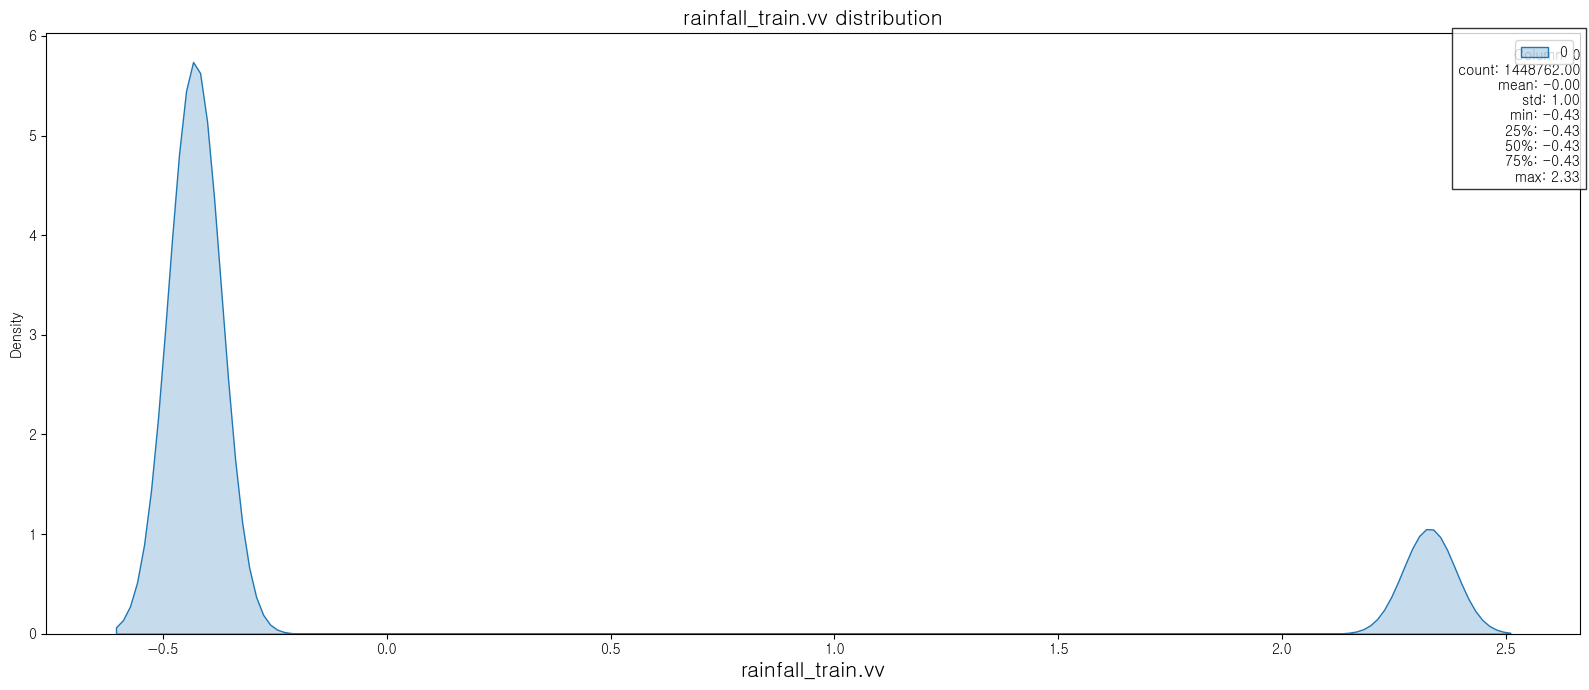

In [20]:
custom_plt.plot_continuous_variable(df, 'rainfall_train.vv', 'kde', True, True)

In [21]:
for i in range(20):
    aws = df['rainfall_train.stn4contest'].unique().tolist()
    mask = (df['rainfall_train.fc_month'] == 5) & (df['rainfall_train.stn4contest'] == f'{aws[i]}')
    df_boxcox = pd.Series(stats.boxcox(df[mask]['rainfall_train.vv'] + 0.000001)[0])
    df_log = pd.DataFrame(df[mask]['rainfall_train.vv']).applymap(lambda x: np.log(x + 1))
    print(f'{aws[i]}')
    print(df_boxcox.skew())

STN001
2.22741873373795
STN002
2.204752322036917
STN003
2.794916254695067
STN004
2.373281198044933
STN005
2.4121174983600215
STN006
2.498402000166076
STN007
2.392746993854406
STN008
2.9827645143562047
STN009
2.653334837835077
STN010
2.6475267267578584
STN011
2.9259890939014075
STN012
3.0020402672267847
STN013
3.0841140562214187
STN014
3.489230956531455
STN015
3.108316532376732
STN016
3.1312905109477276
STN017
3.2179761565816944
STN018
2.983988593801522
STN019
2.3305474124363497
STN020
3.0274474269627794


In [22]:
self_test = pd.read_csv('Database/test/X_self_test_norm.csv', index_col=0)

In [27]:
self_test

,rainfall_train.dh,rainfall_train.v01,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,...,rainfall_train.ef_day_30,rainfall_train.ef_day_31,rainfall_train.ef_hour_0,rainfall_train.ef_hour_3,rainfall_train.ef_hour_6,rainfall_train.ef_hour_9,rainfall_train.ef_hour_12,rainfall_train.ef_hour_15,rainfall_train.ef_hour_18,rainfall_train.ef_hour_21
54256,0.759494,-1.036971,-0.939973,-0.801748,-0.691718,-0.588046,-0.446242,-0.325896,-0.191676,-0.125634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
189207,0.721519,-1.036971,-0.939973,-0.801748,-0.691718,-0.588046,-0.446242,-0.325896,-0.191676,-0.125634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
263088,0.582278,-0.900187,-0.865872,-0.801748,-0.691718,-0.588046,-0.446242,-0.325896,-0.191676,-0.125634,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
694700,0.050633,-1.036971,-0.939973,-0.801748,-0.691718,-0.588046,-0.446242,-0.325896,-0.191676,-0.125634,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
660568,0.734177,-0.489836,-0.532419,-0.585020,-0.488010,-0.337420,-0.253934,0.015521,-0.191676,-0.125634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305612,0.658228,1.938076,2.135205,2.015706,2.312984,2.294144,2.246073,1.893314,0.683539,0.776925,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
829901,0.898734,2.382624,2.765060,3.272723,3.789872,3.923208,3.880692,2.064022,0.683539,-0.125634,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1410178,0.291139,-0.763404,-0.791771,-0.628366,-0.691718,-0.588046,-0.446242,-0.325896,-0.191676,-0.125634,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1074628,0.860759,-1.036971,-0.939973,-0.801748,-0.691718,-0.588046,-0.446242,-0.325896,-0.191676,-0.125634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


GaussianMixture(init_params='k-means++', random_state=42)

Cluster count: 1, BIC: -5255680.796808773


GaussianMixture(init_params='k-means++', n_components=2, random_state=42)

Cluster count: 2, BIC: -14624078.28835725


GaussianMixture(init_params='k-means++', n_components=3, random_state=42)

Cluster count: 3, BIC: -26008450.649985358


GaussianMixture(init_params='k-means++', n_components=4, random_state=42)

Cluster count: 4, BIC: -32797721.350217625


GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

Cluster count: 5, BIC: -40196811.04990127


GaussianMixture(init_params='k-means++', n_components=6, random_state=42)

Cluster count: 6, BIC: -41222022.32177866


GaussianMixture(init_params='k-means++', n_components=7, random_state=42)

Cluster count: 7, BIC: -43371119.647998065


GaussianMixture(init_params='k-means++', n_components=8, random_state=42)

Cluster count: 8, BIC: -43671505.59228185


GaussianMixture(init_params='k-means++', n_components=9, random_state=42)

Cluster count: 9, BIC: -45071012.67066844


GaussianMixture(init_params='k-means++', n_components=10, random_state=42)

Cluster count: 10, BIC: -45479970.35228563


GaussianMixture(init_params='k-means++', n_components=11, random_state=42)

Cluster count: 11, BIC: -46802979.584279746


GaussianMixture(init_params='k-means++', n_components=12, random_state=42)

Cluster count: 12, BIC: -47861429.57895658


GaussianMixture(init_params='k-means++', n_components=13, random_state=42)

Cluster count: 13, BIC: -47165729.99211163


GaussianMixture(init_params='k-means++', n_components=14, random_state=42)

Cluster count: 14, BIC: -48353732.166553706


GaussianMixture(init_params='k-means++', n_components=15, random_state=42)

Cluster count: 15, BIC: -48980941.55621787


GaussianMixture(init_params='k-means++', n_components=16, random_state=42)

Cluster count: 16, BIC: -48606447.51880058


GaussianMixture(init_params='k-means++', n_components=17, random_state=42)

Cluster count: 17, BIC: -47108565.46311011


GaussianMixture(init_params='k-means++', n_components=18, random_state=42)

Cluster count: 18, BIC: -46108598.690704726


GaussianMixture(init_params='k-means++', n_components=19, random_state=42)

Cluster count: 19, BIC: -45810337.51681631


GaussianMixture(init_params='k-means++', n_components=20, random_state=42)

Cluster count: 20, BIC: -45149206.57305809
Optimal number of clusters: 15


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'BIC Scores for Different Number of Clusters')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'BIC Score')

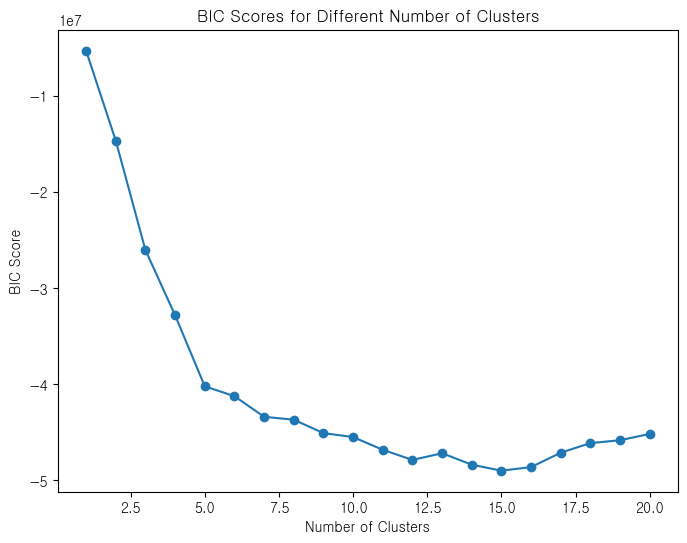

In [63]:
# BIC 스코어를 저장할 리스트를 초기화합니다.
bic_scores = []

# 클러스터 개수의 범위를 설정합니다.
cluster_range = range(1, 21)

# 각 클러스터 개수에 대해 GMM을 적합시키고 BIC 스코어를 계산합니다.
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, init_params='k-means++', random_state=42)
    gmm.fit(self_test)
    bic = gmm.bic(self_test)
    bic_scores.append(bic)
    print(f'Cluster count: {n_clusters}, BIC: {bic}')

# 최적의 클러스터 개수를 선택합니다.
optimal_clusters = cluster_range[np.argmin(bic_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')

# BIC 스코어를 시각화합니다.
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, bic_scores, marker='o')
plt.title('BIC Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.show()

In [24]:
gmm = GaussianMixture(n_components=15, max_iter=1000, init_params='k-means++', random_state=42)
gmm.fit(self_test)

GaussianMixture(init_params='k-means++', max_iter=1000, n_components=15,
                random_state=42)

In [28]:
joblib.dump(gmm, 'Database/gmm_model.pkl')

['Database/gmm_model.pkl']

In [41]:
GMM = joblib.load('Database/gmm_model.pkl')

In [42]:
y_test = pd.read_csv('Database/test/y_self_test.csv', index_col=0)

In [43]:
test = pd.concat([y_test, pd.DataFrame(GMM.predict(self_test), index=self_test.index)], axis=1)

STN001


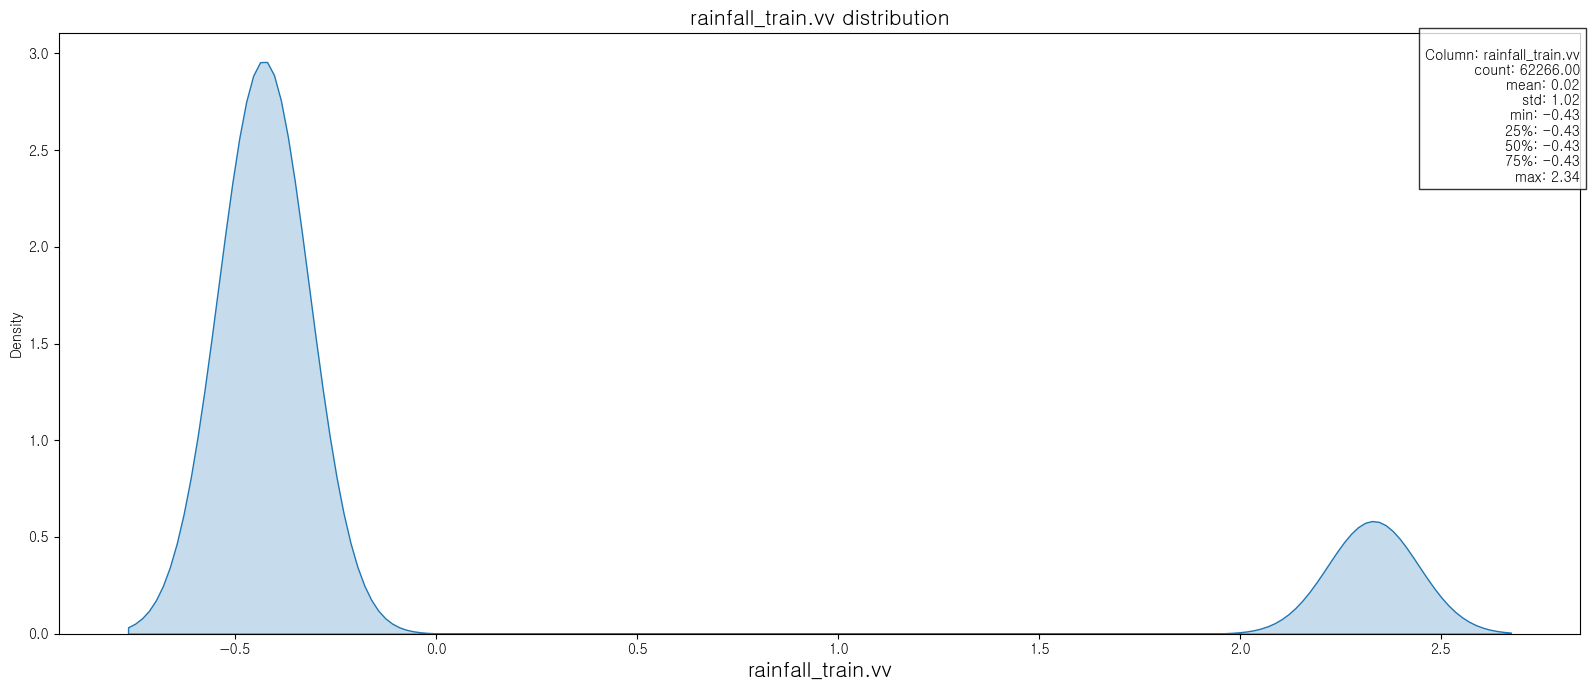

STN002


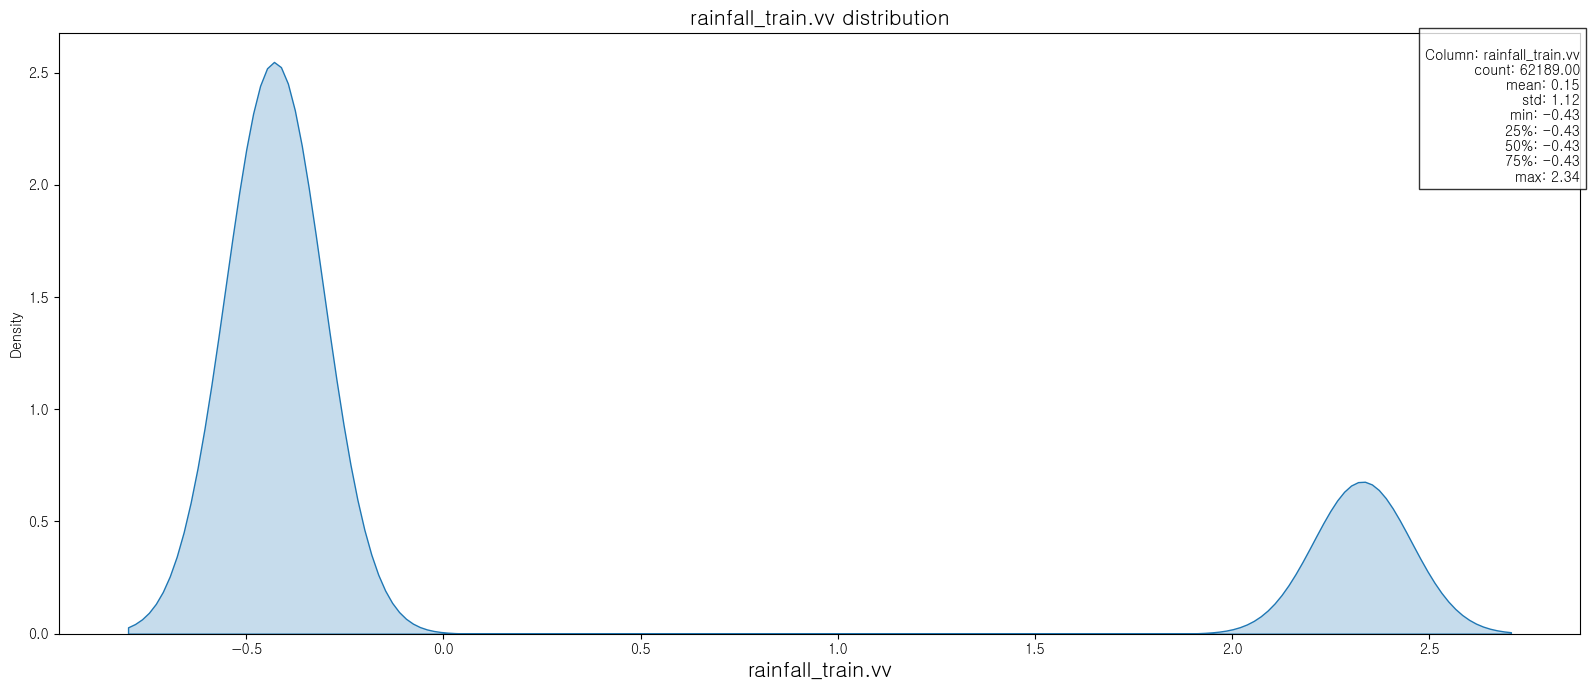

STN003


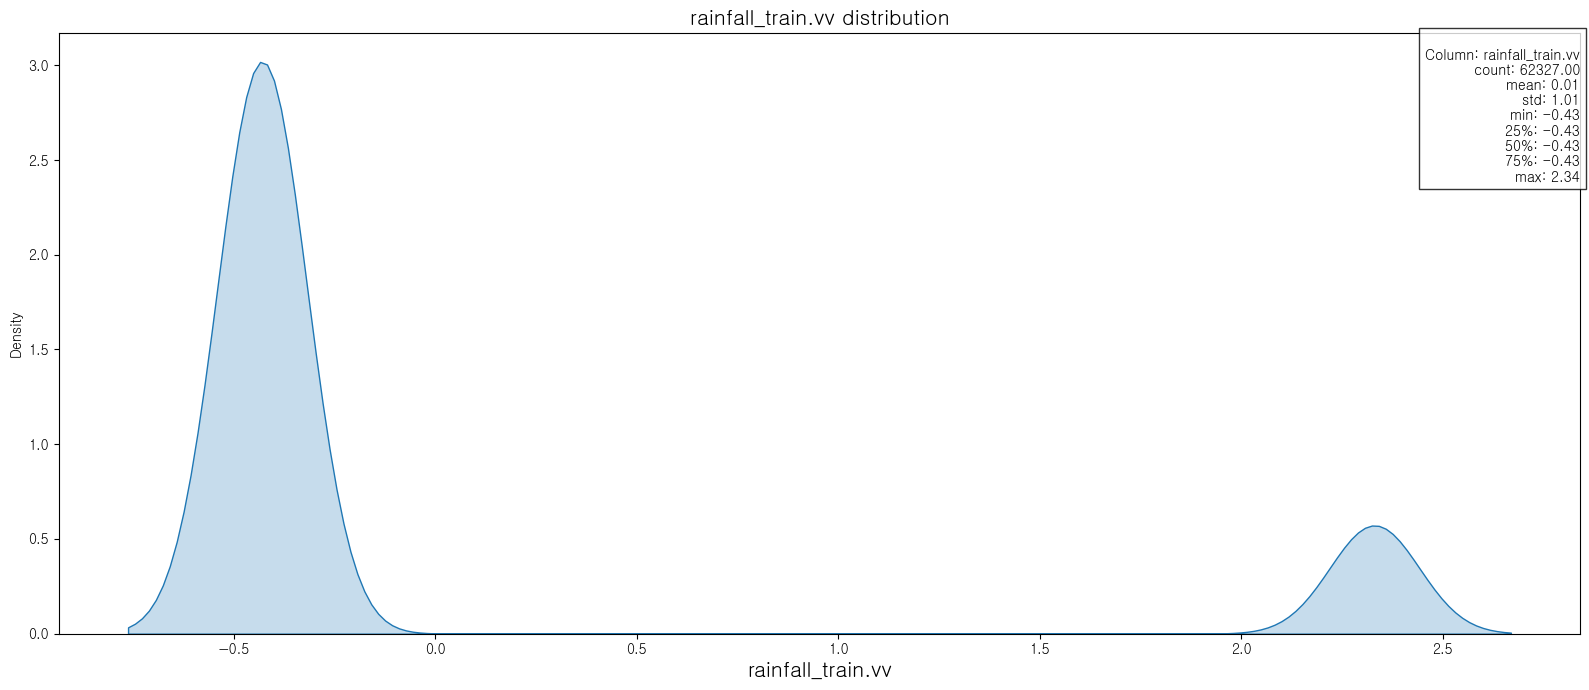

STN004


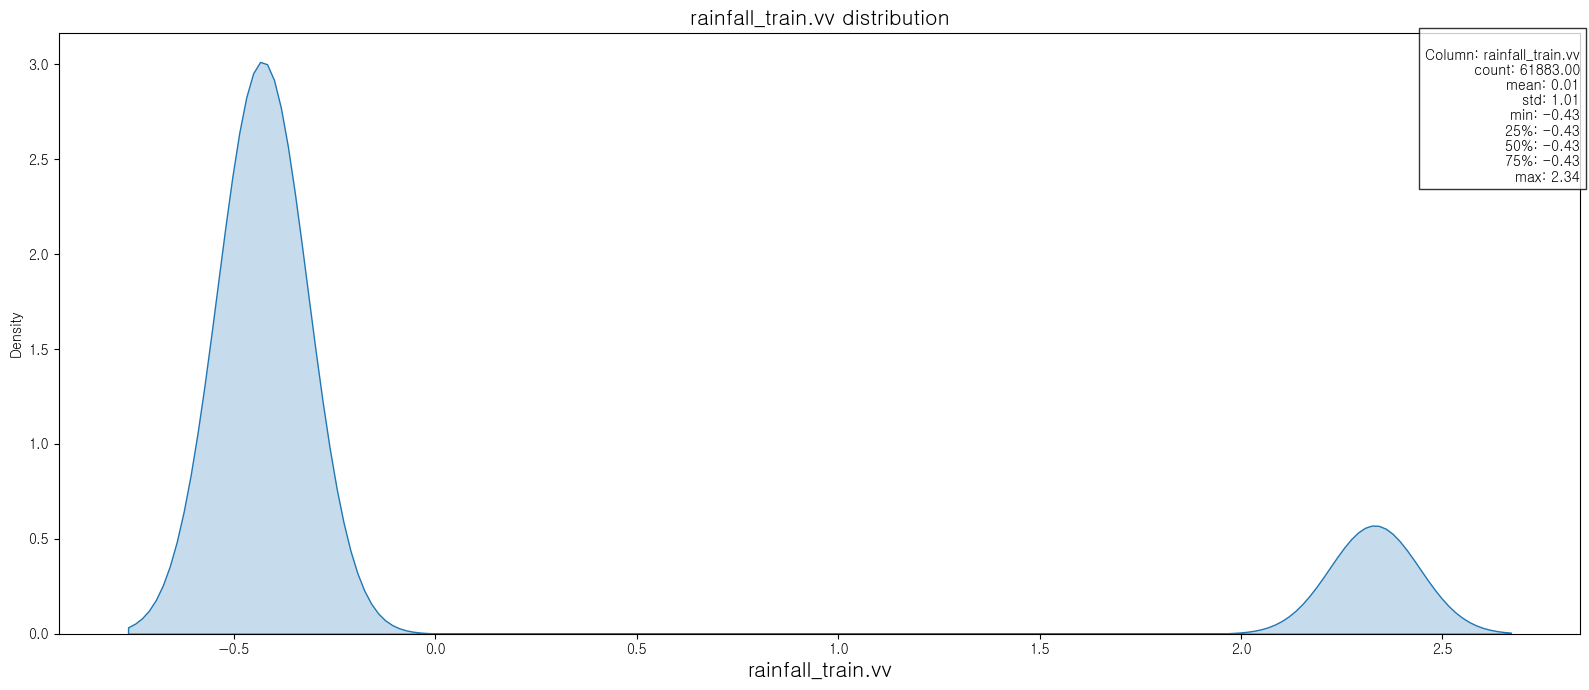

STN005


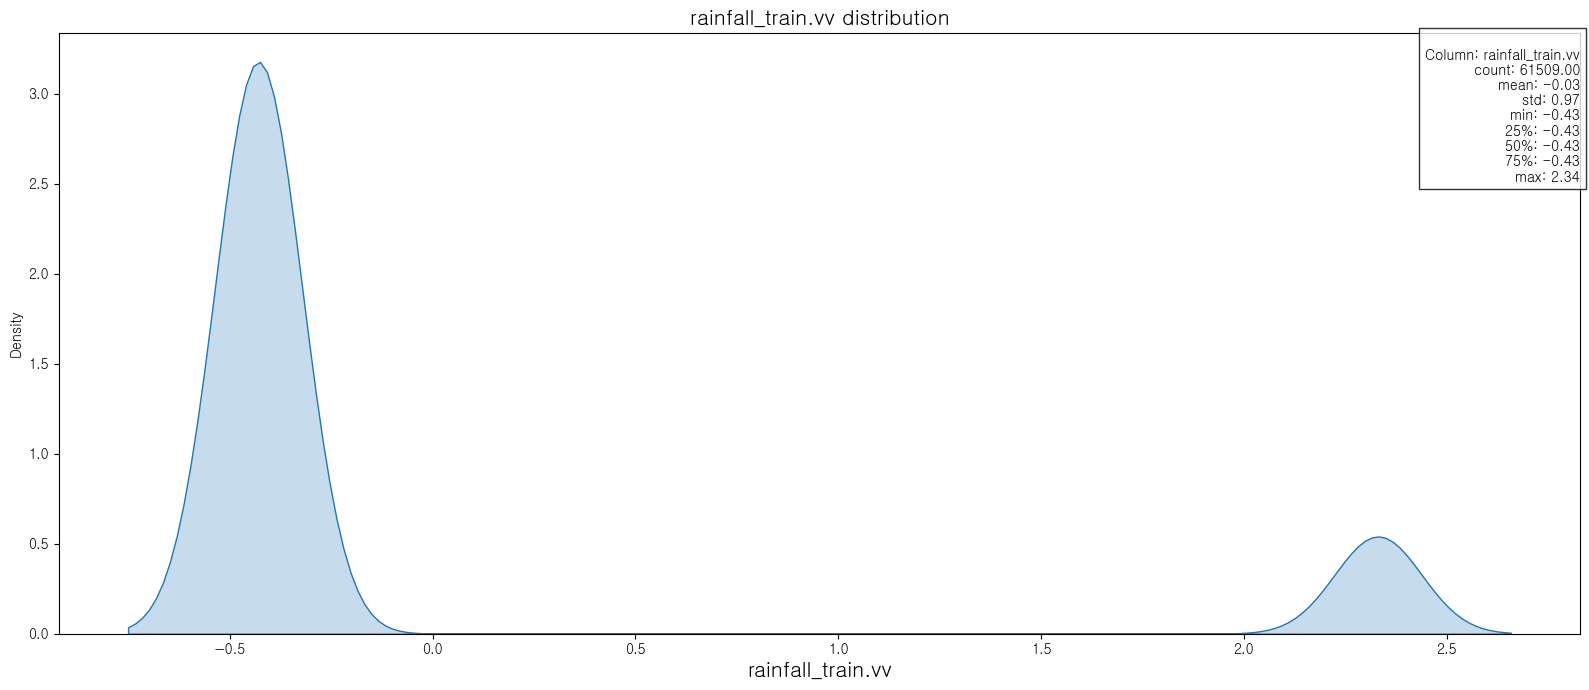

STN006


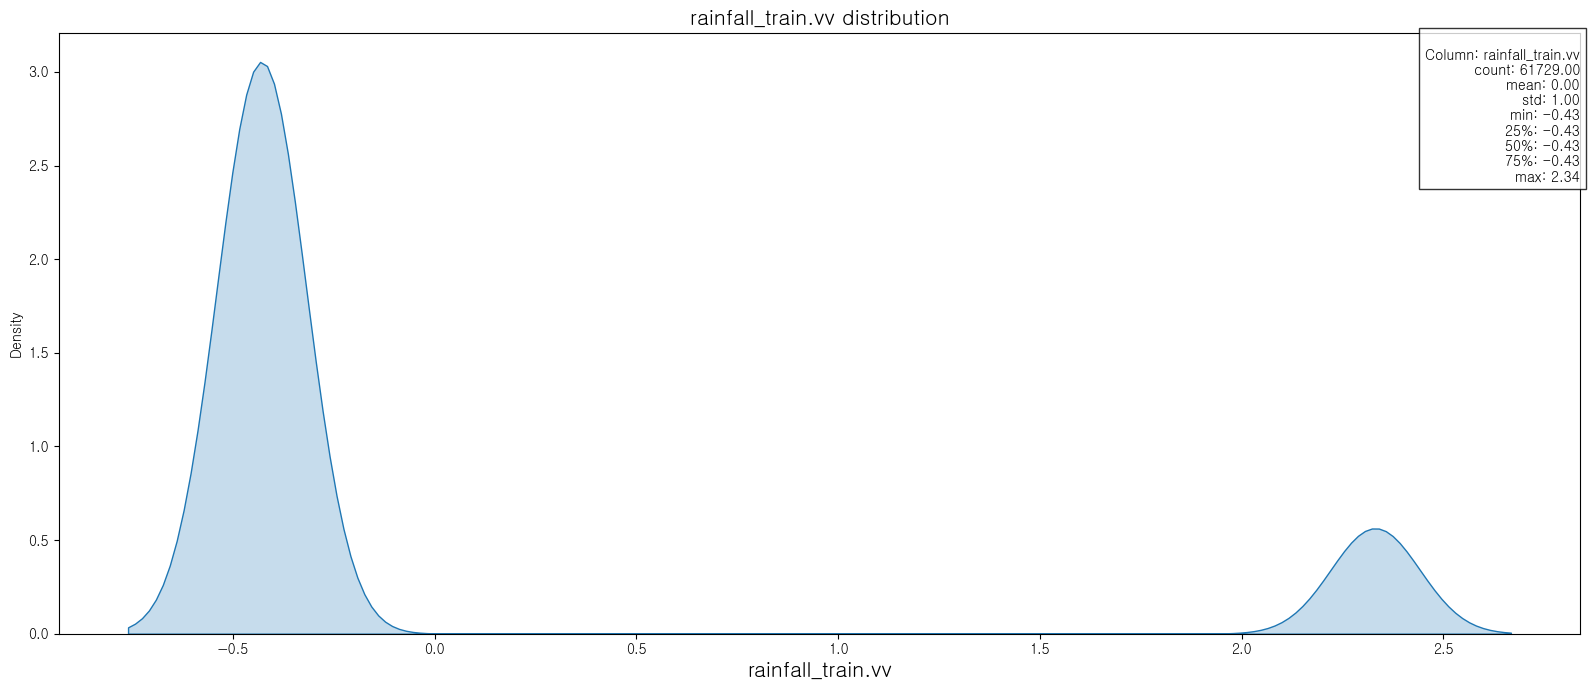

STN007


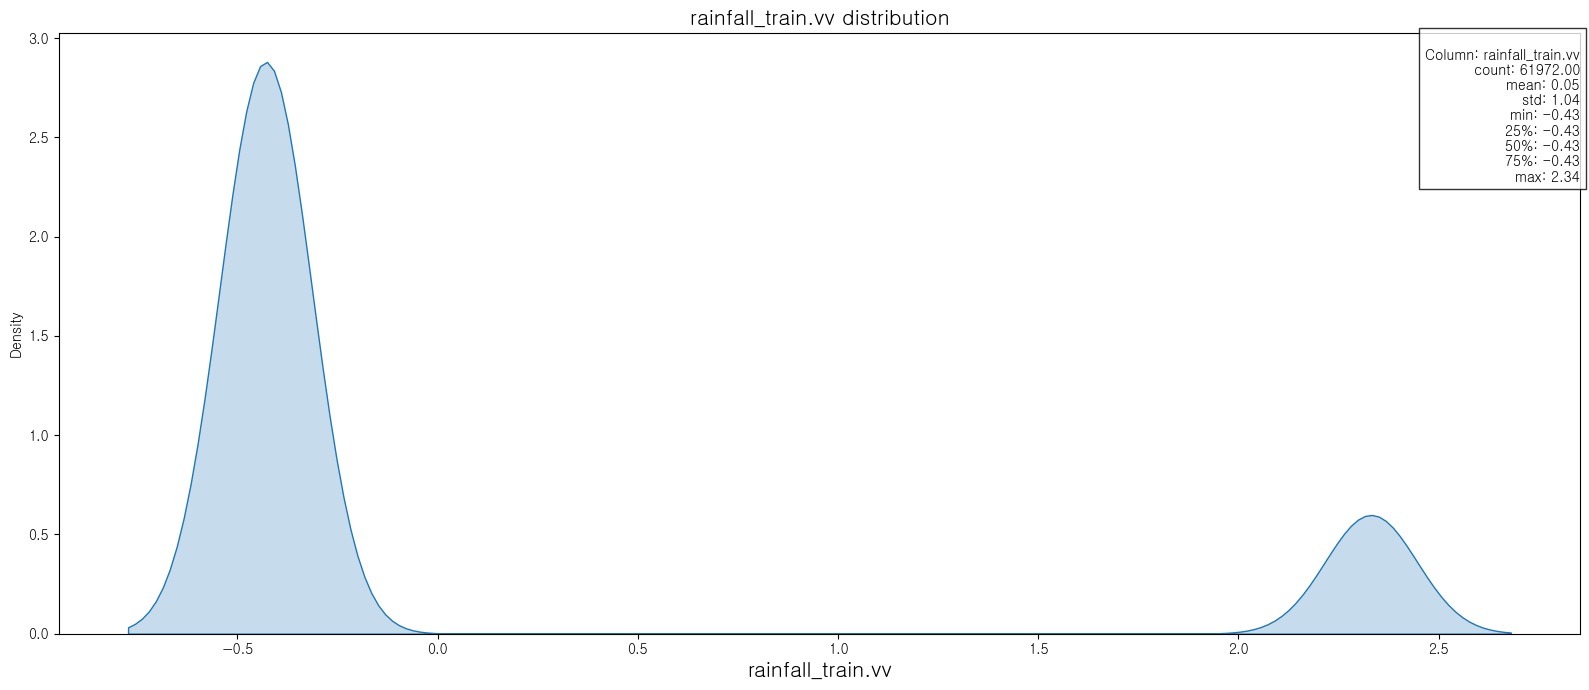

STN008


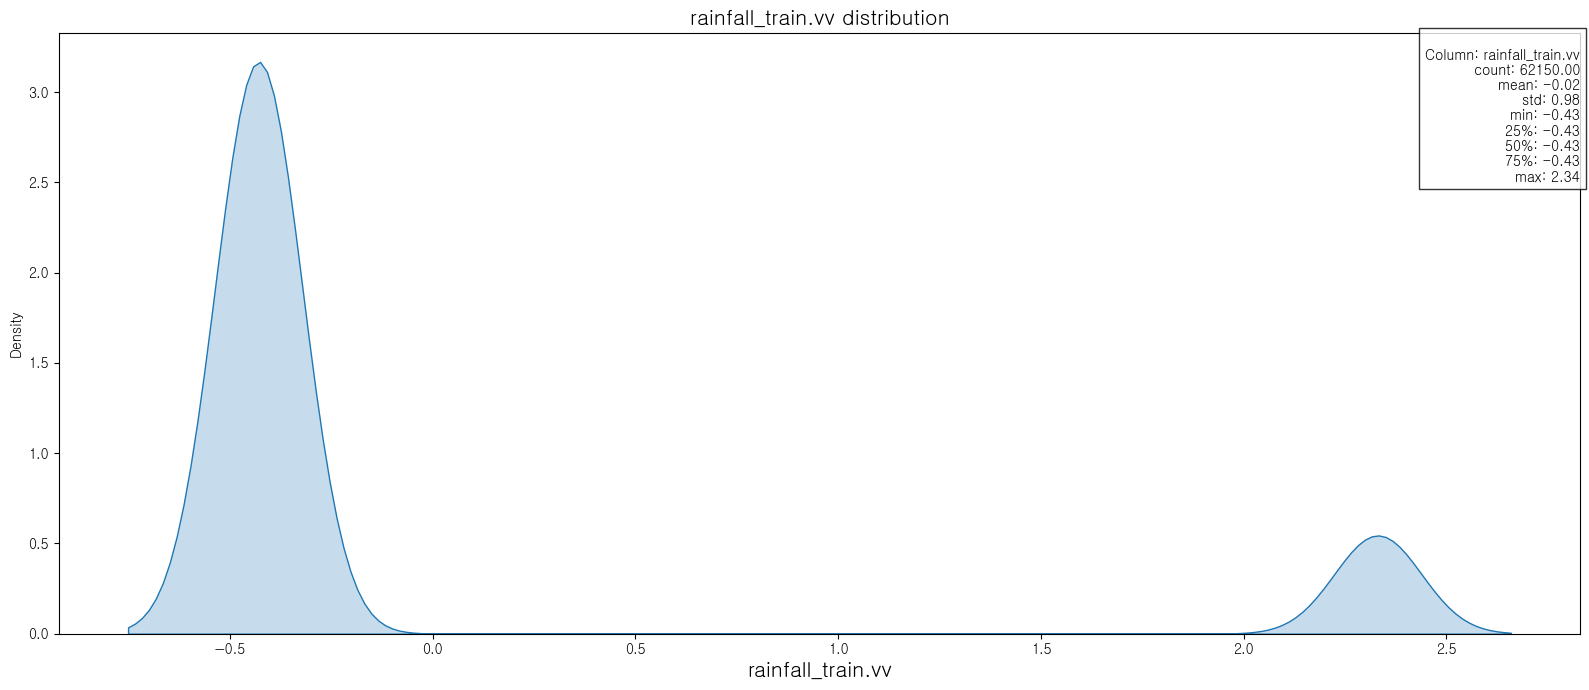

STN009


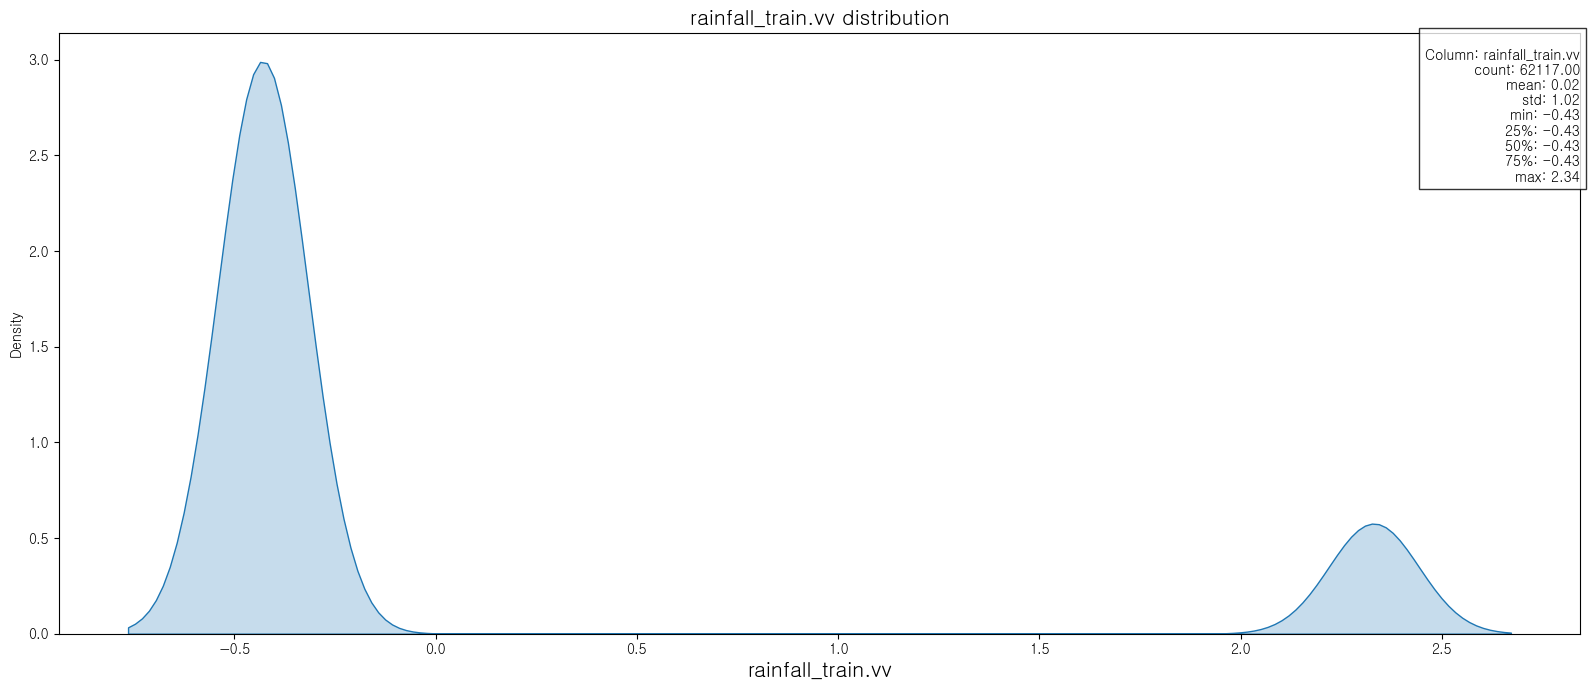

STN010


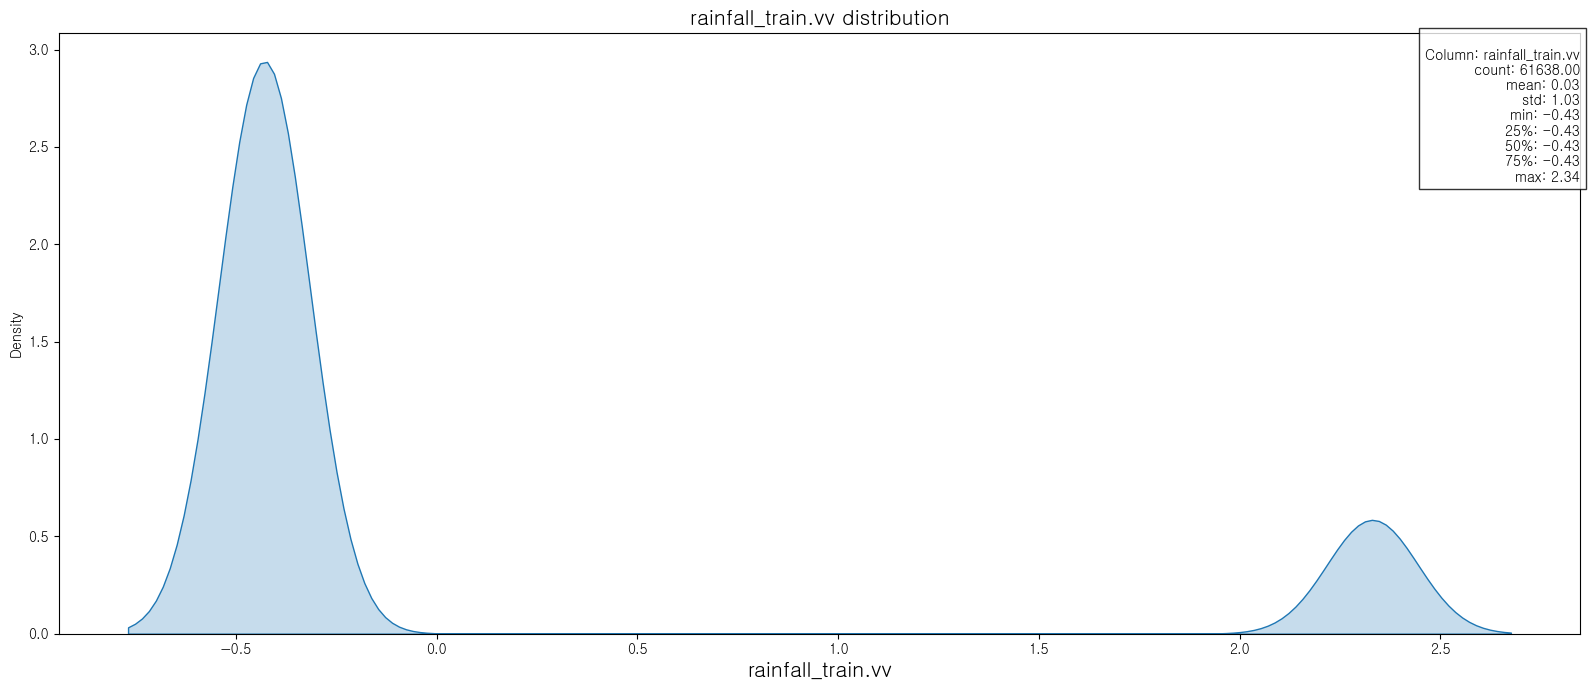

STN011


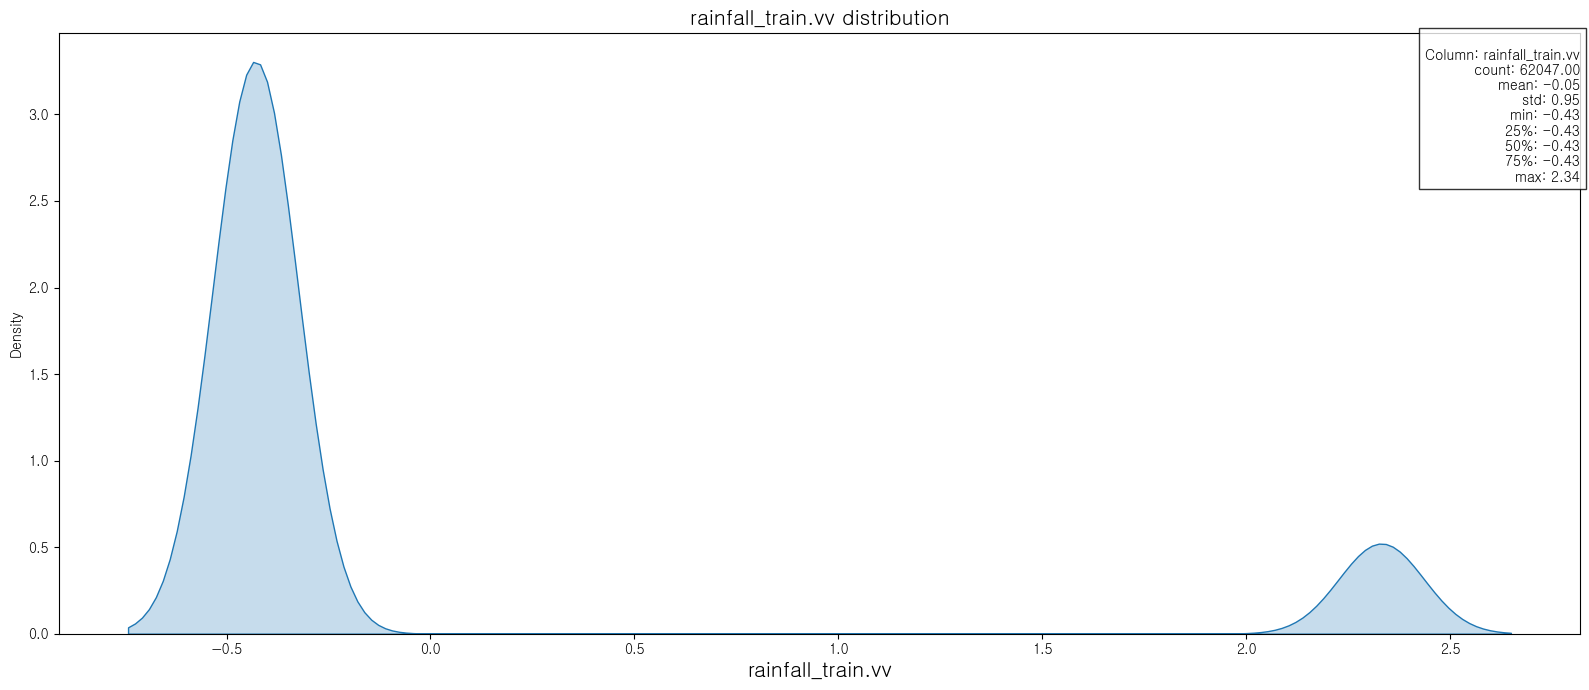

STN012


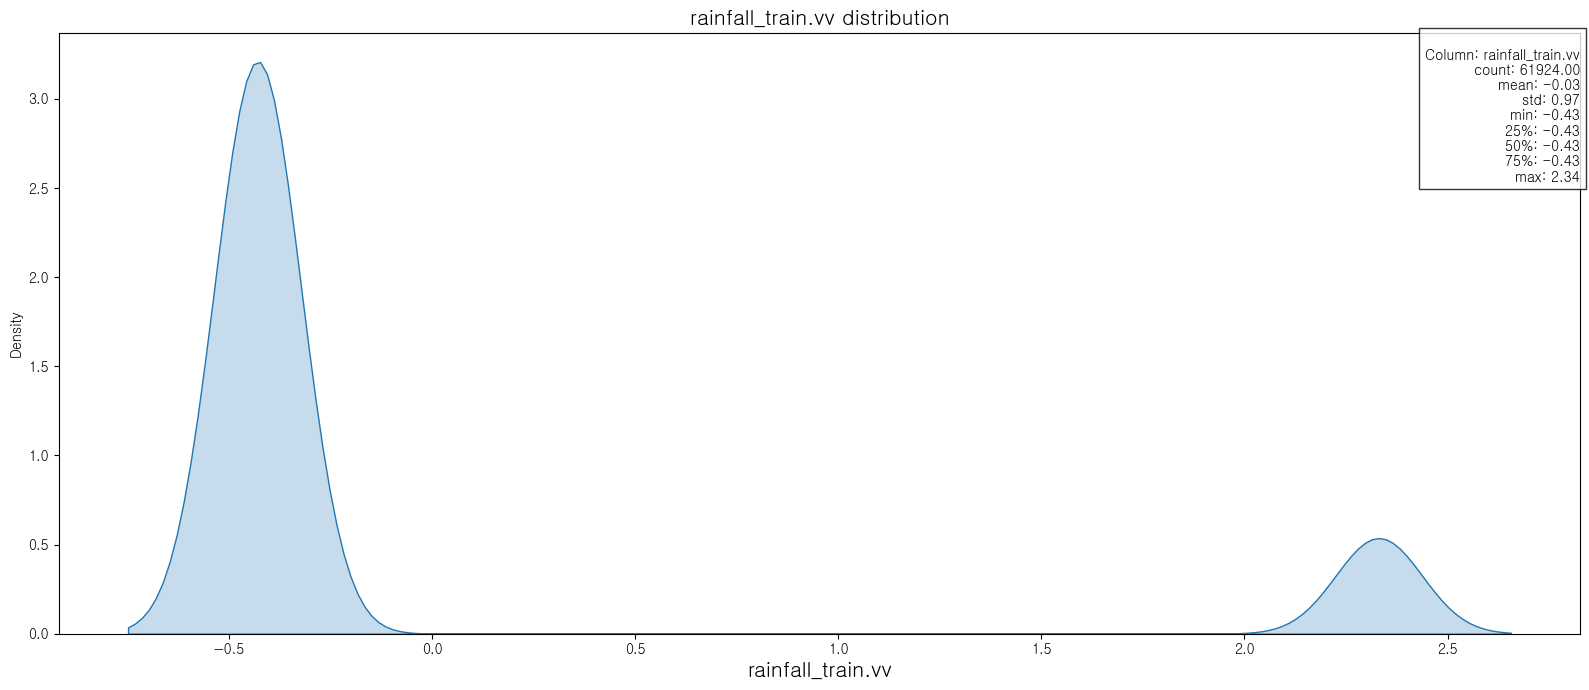

STN013


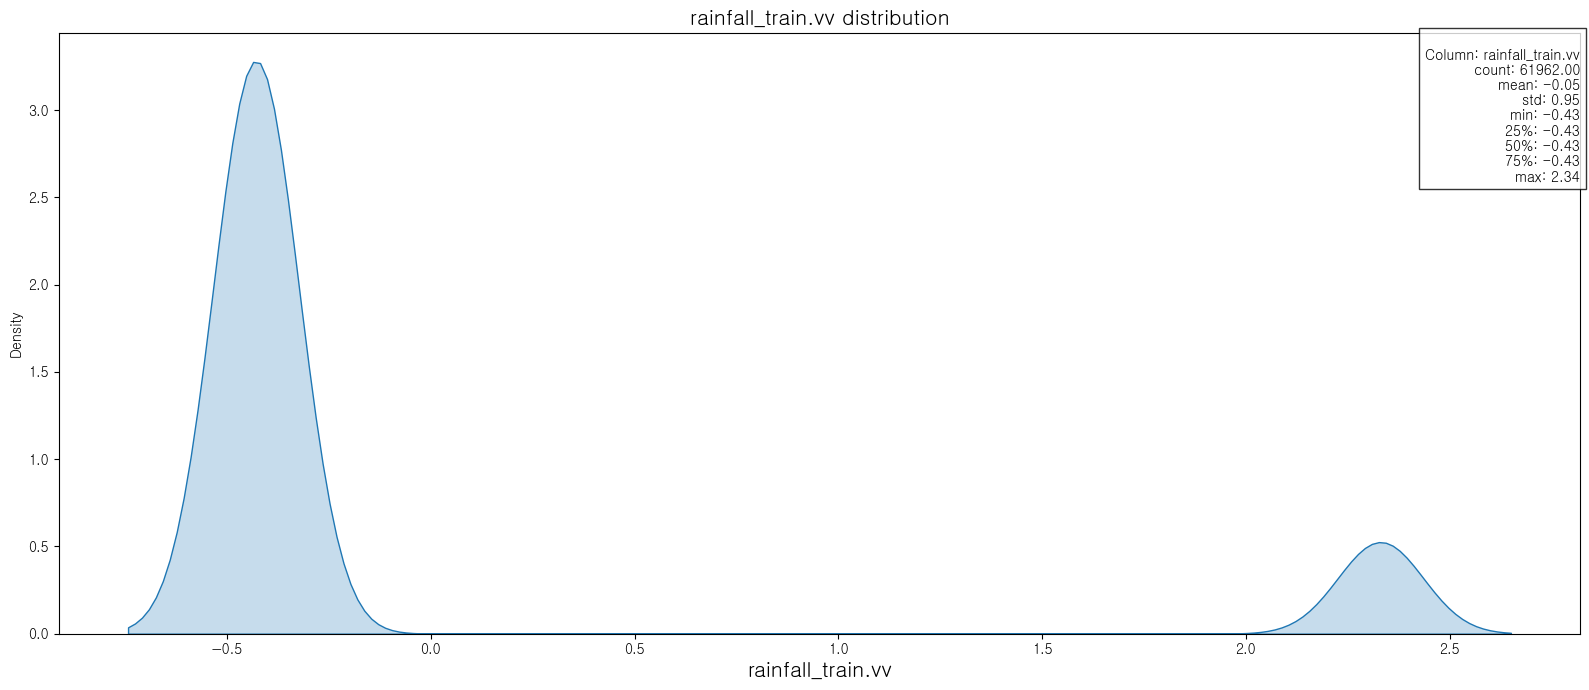

STN014


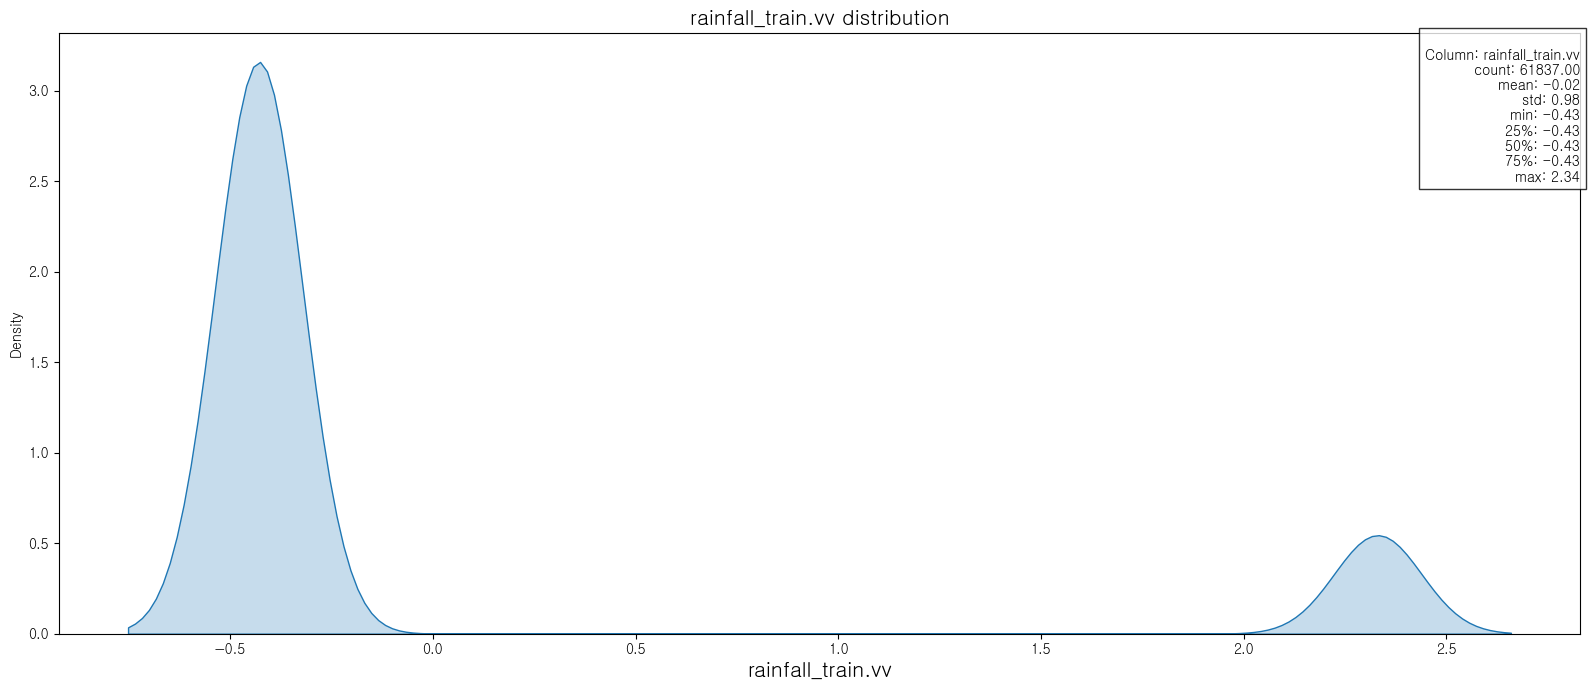

STN015


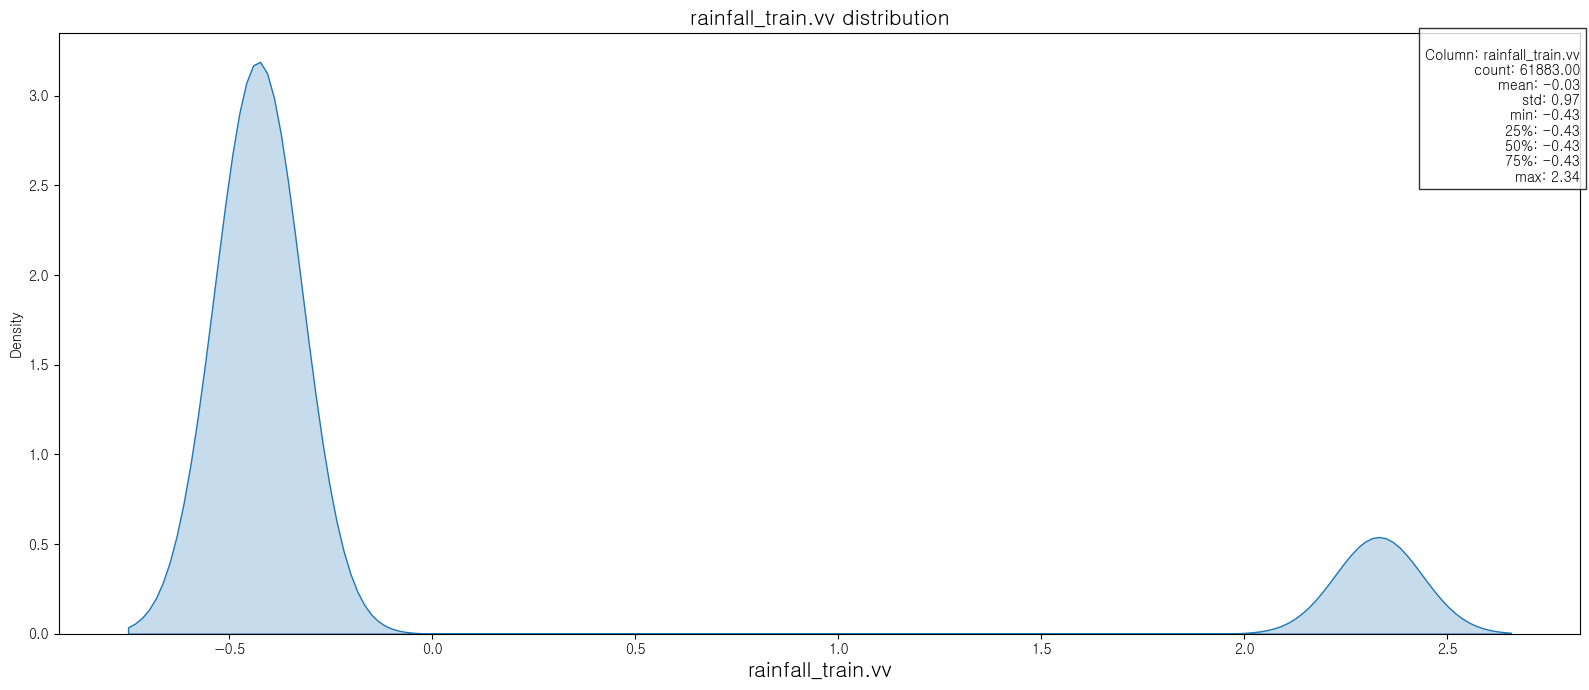

STN016


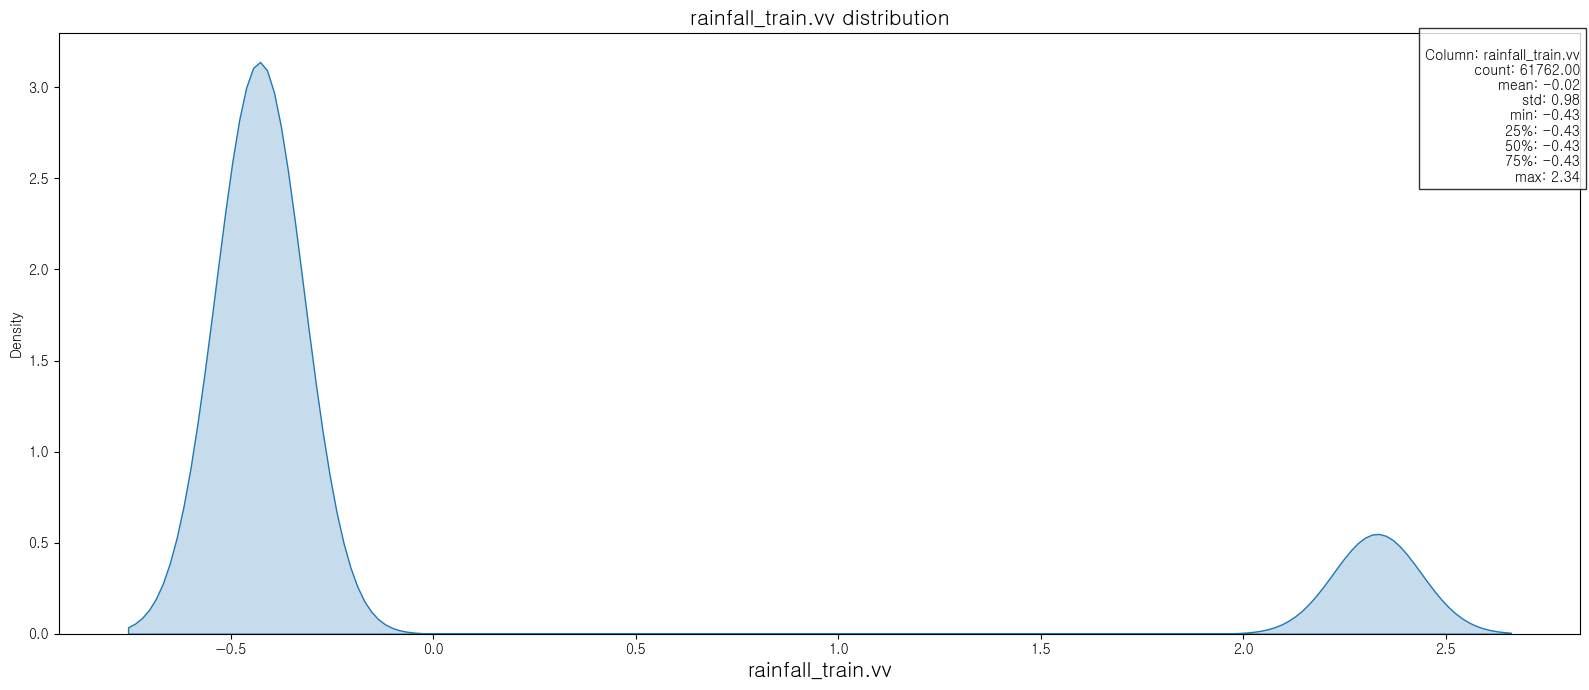

STN017


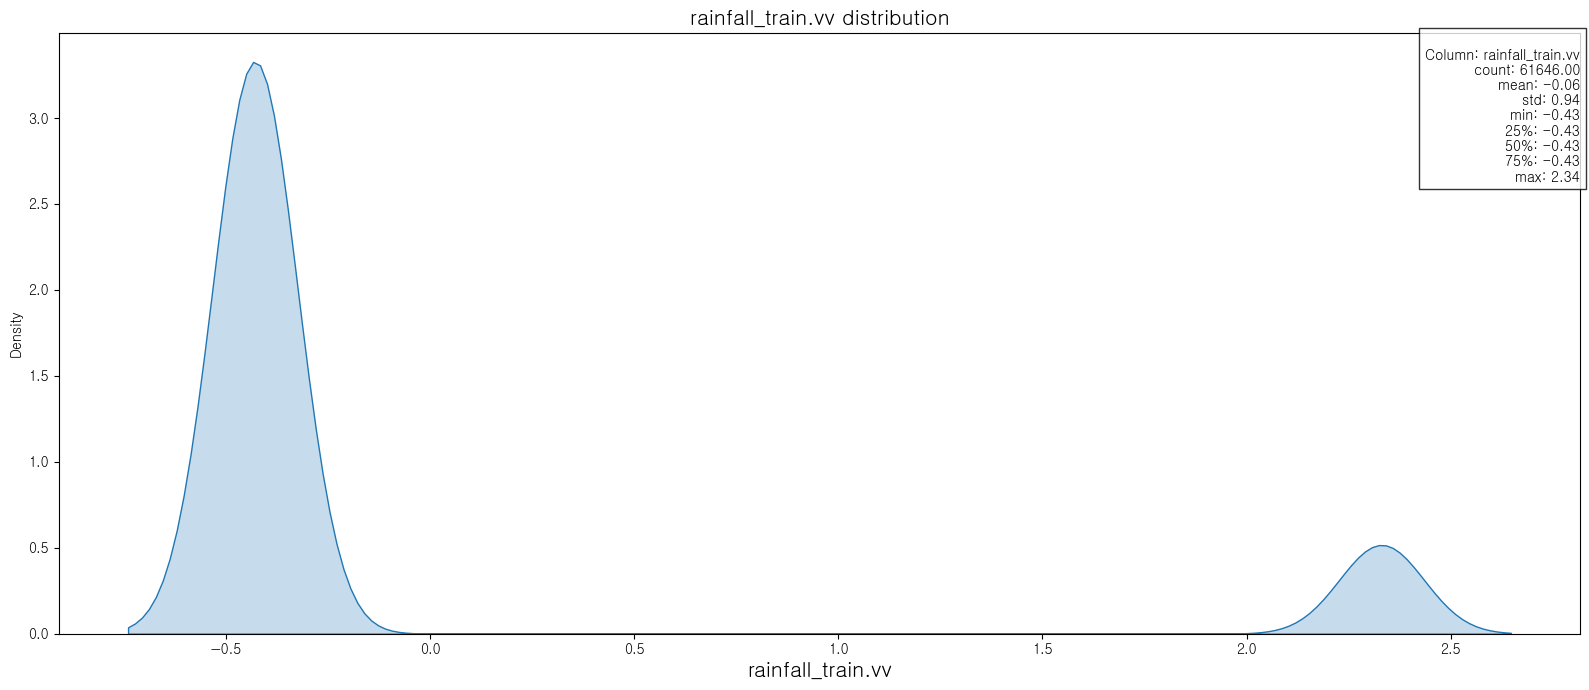

STN018


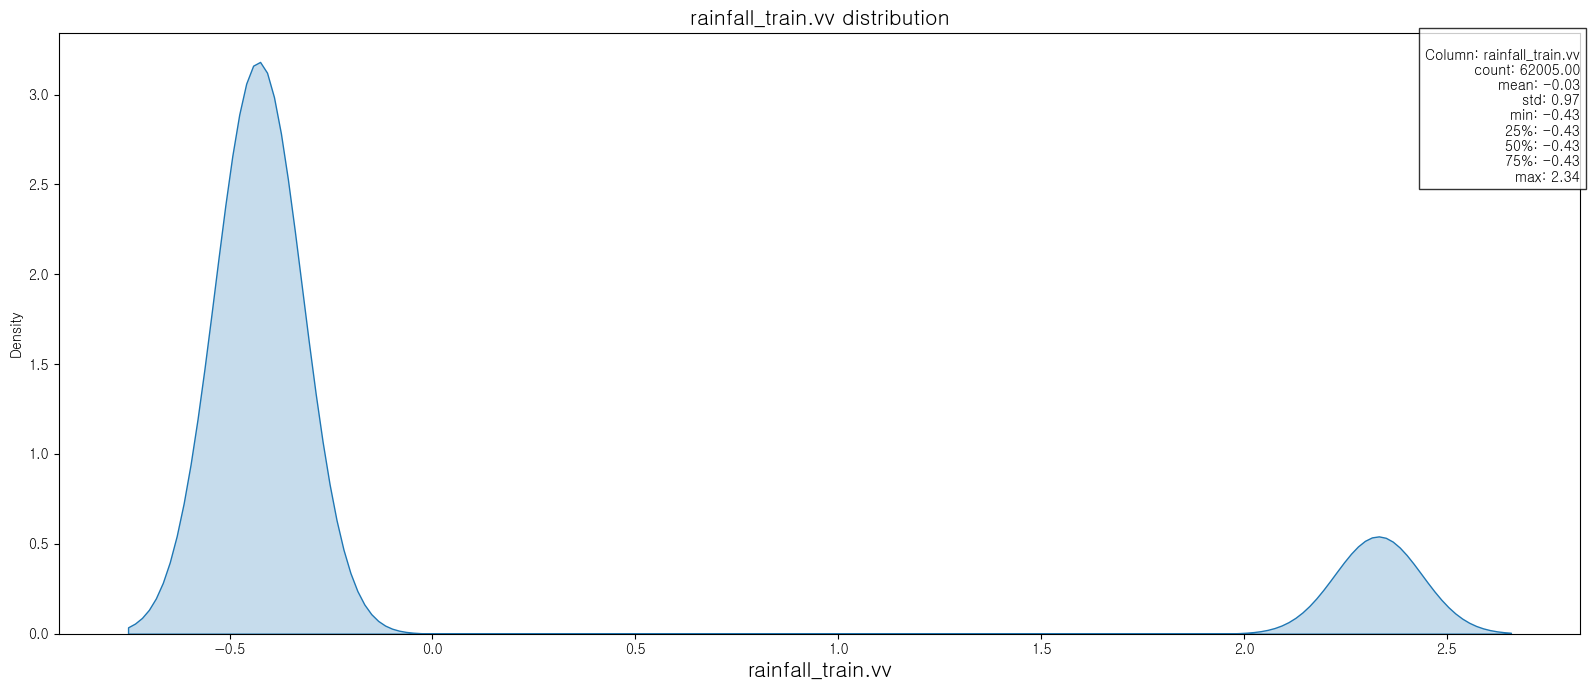

STN019


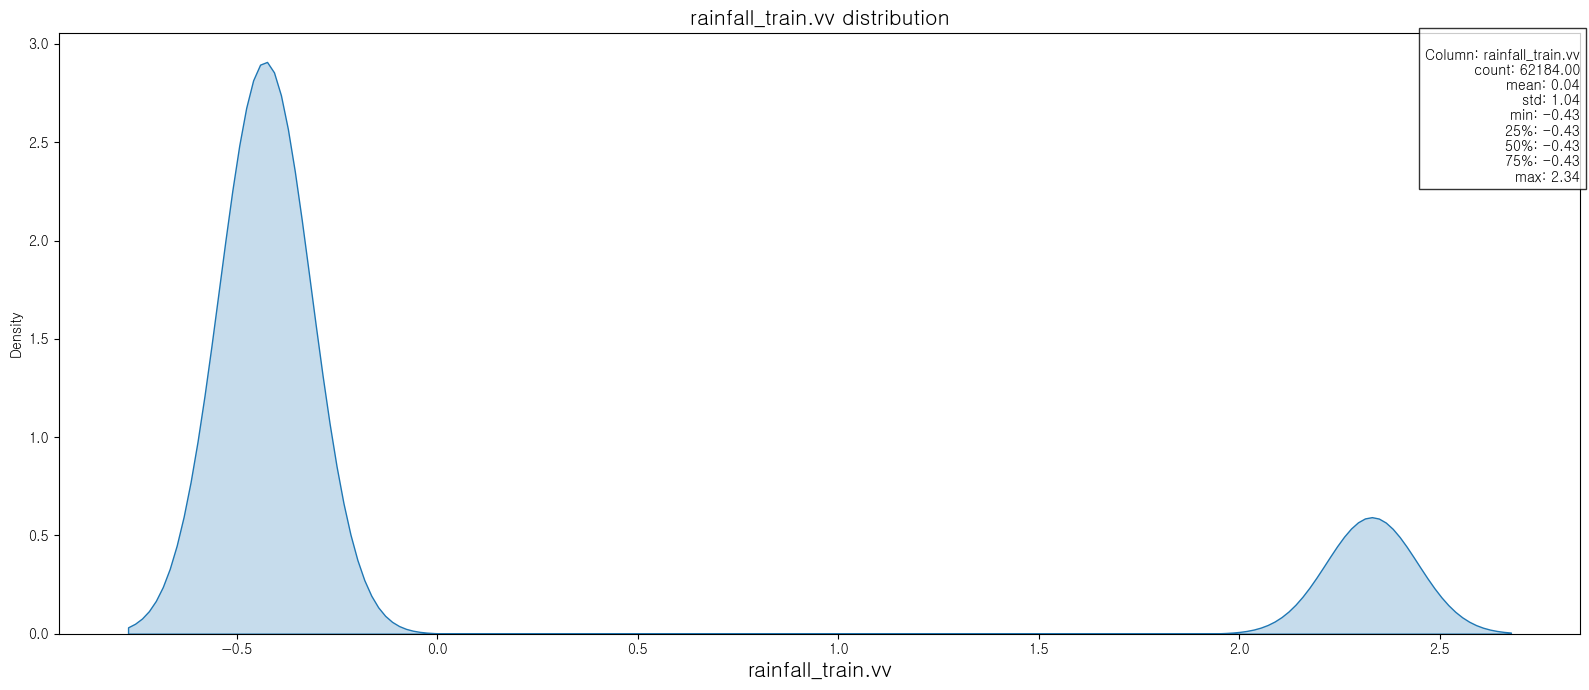

STN020


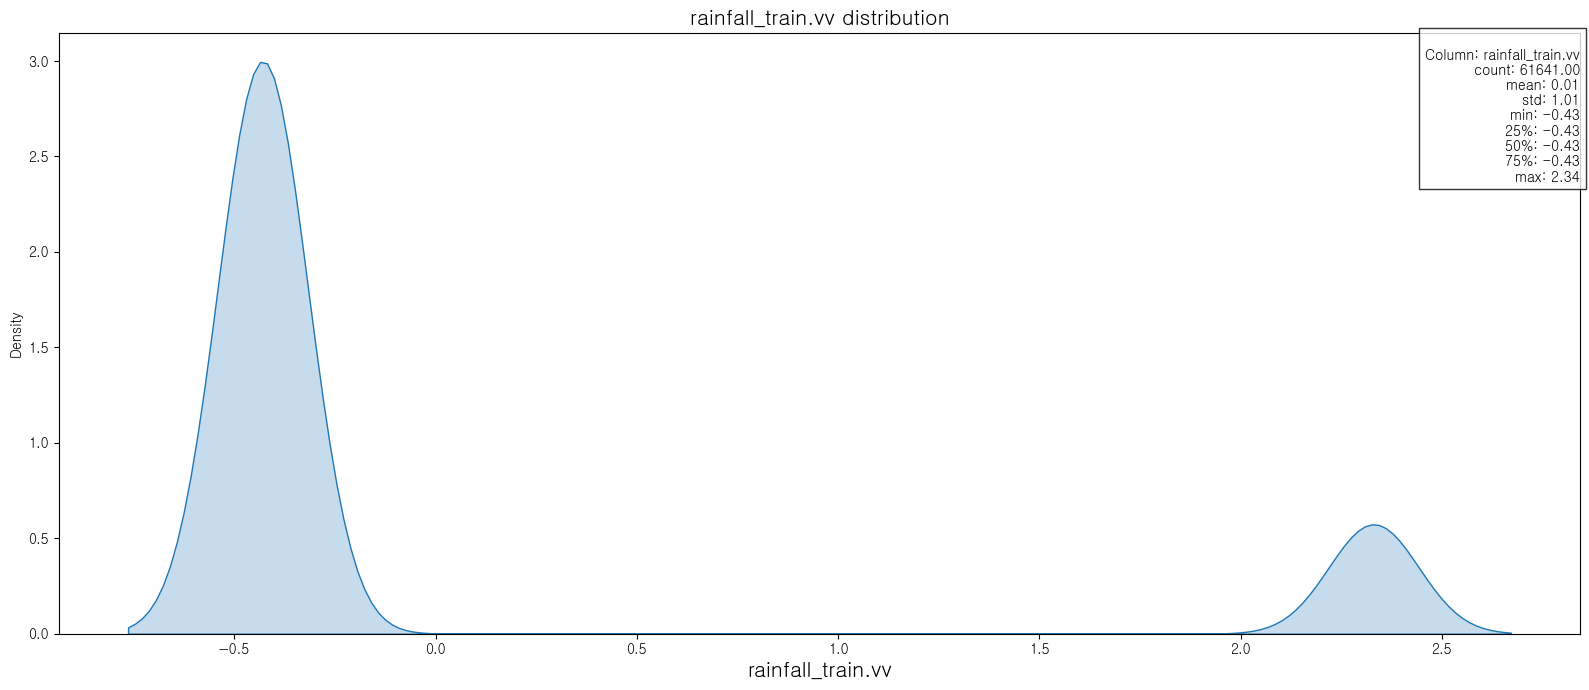

In [62]:
import os

STN_list = ['STN001', 'STN002', 'STN003', 'STN004', 'STN005', 'STN006', 'STN007', 'STN008', 'STN009', 'STN010',
            'STN011', 'STN012', 'STN013', 'STN014', 'STN015', 'STN016', 'STN017', 'STN018', 'STN019', 'STN020']
directory = 'Database/train/'
files = sorted(filename for filename in os.listdir(directory) if filename.endswith('.csv'))

for i, STN in enumerate(STN_list):
    print(STN)
    file_list = [sentence for sentence in files if STN in sentence]
    y_train = pd.read_csv(os.path.join(directory, file_list[1]), index_col=0)
    custom_plt.plot_continuous_variable(y_train, 'rainfall_train.vv', 'kde', False, False)

0


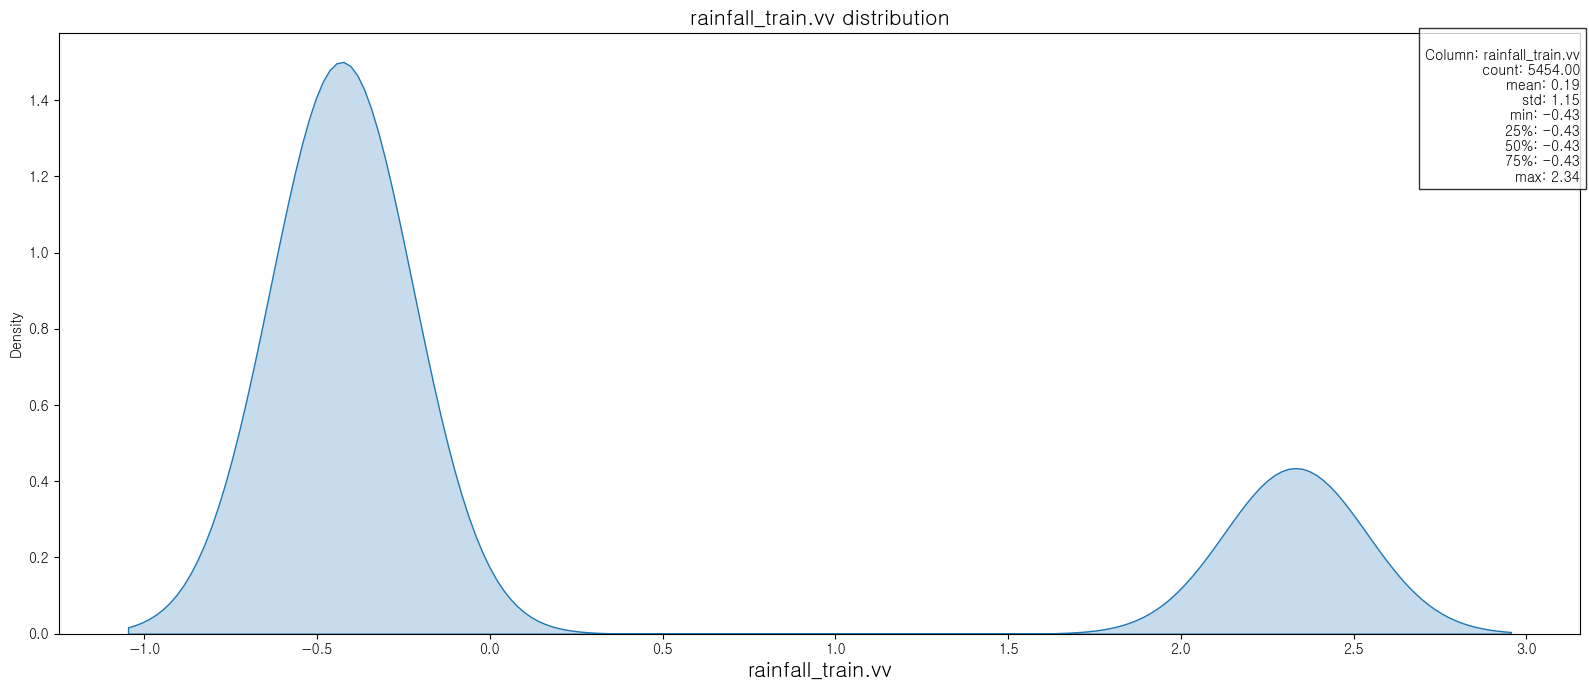

1


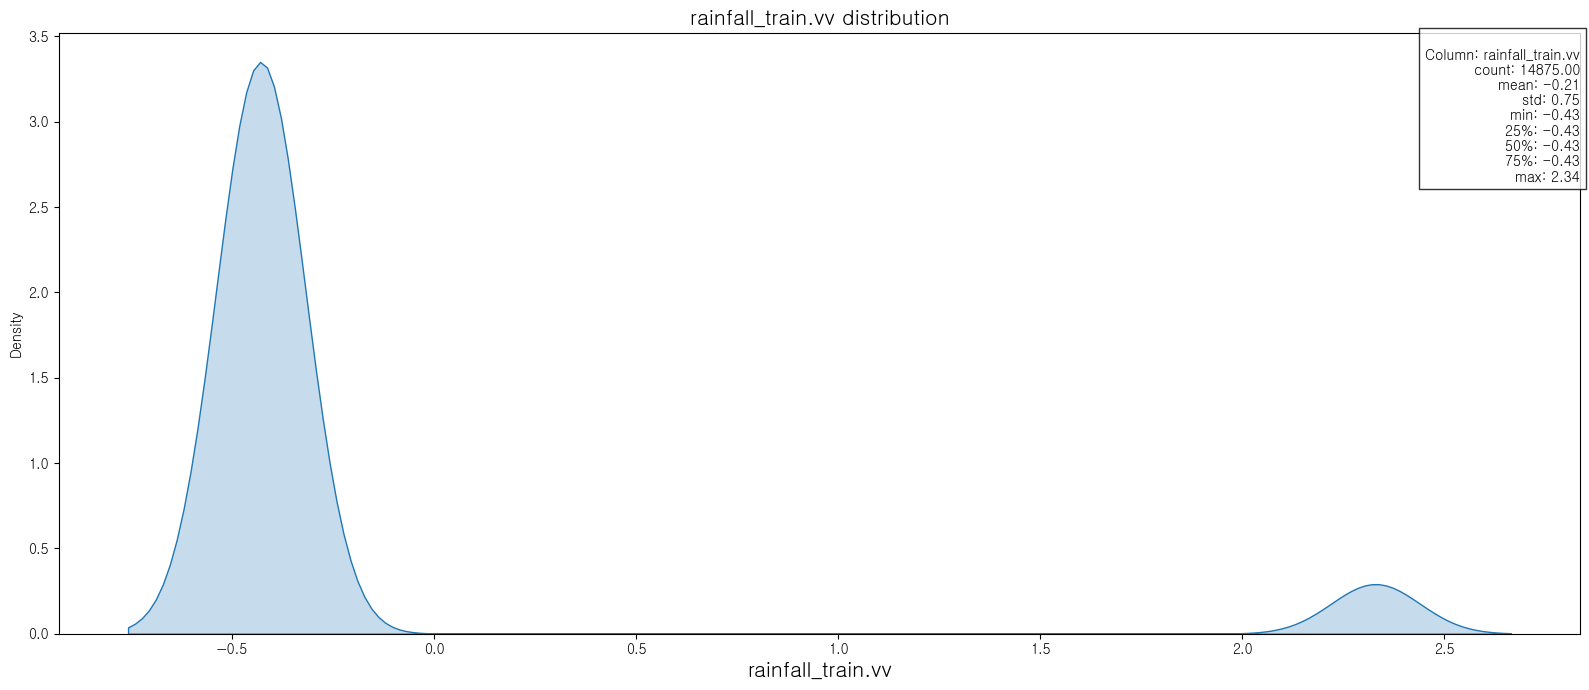

2


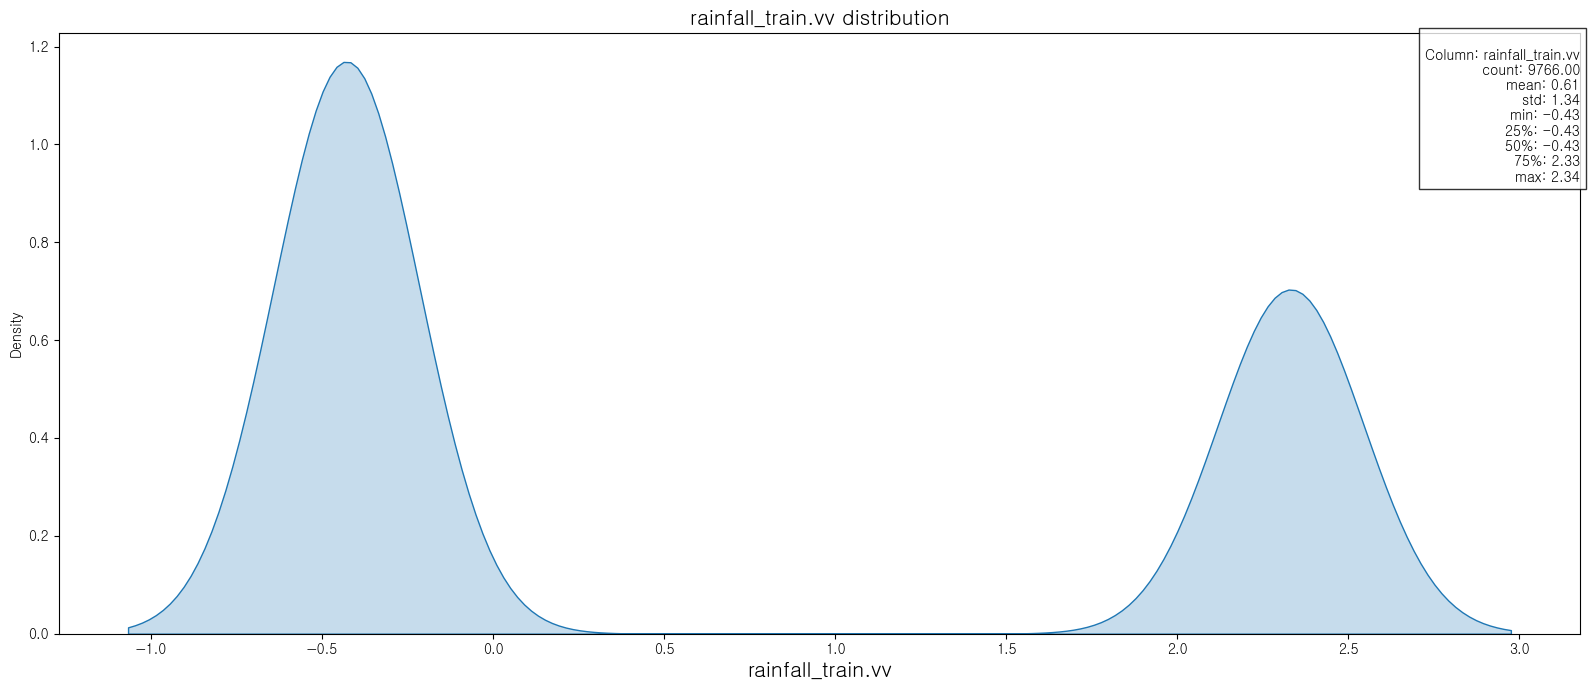

3


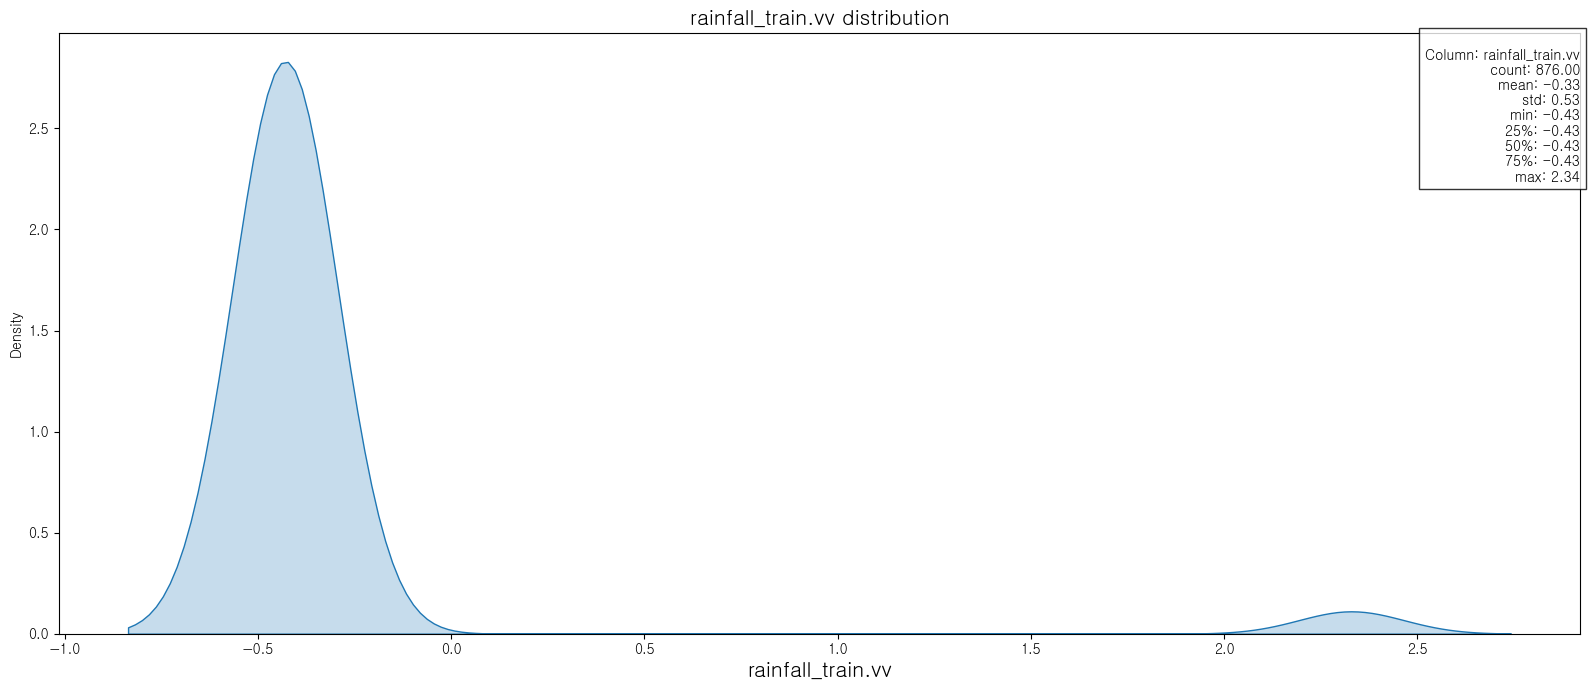

4


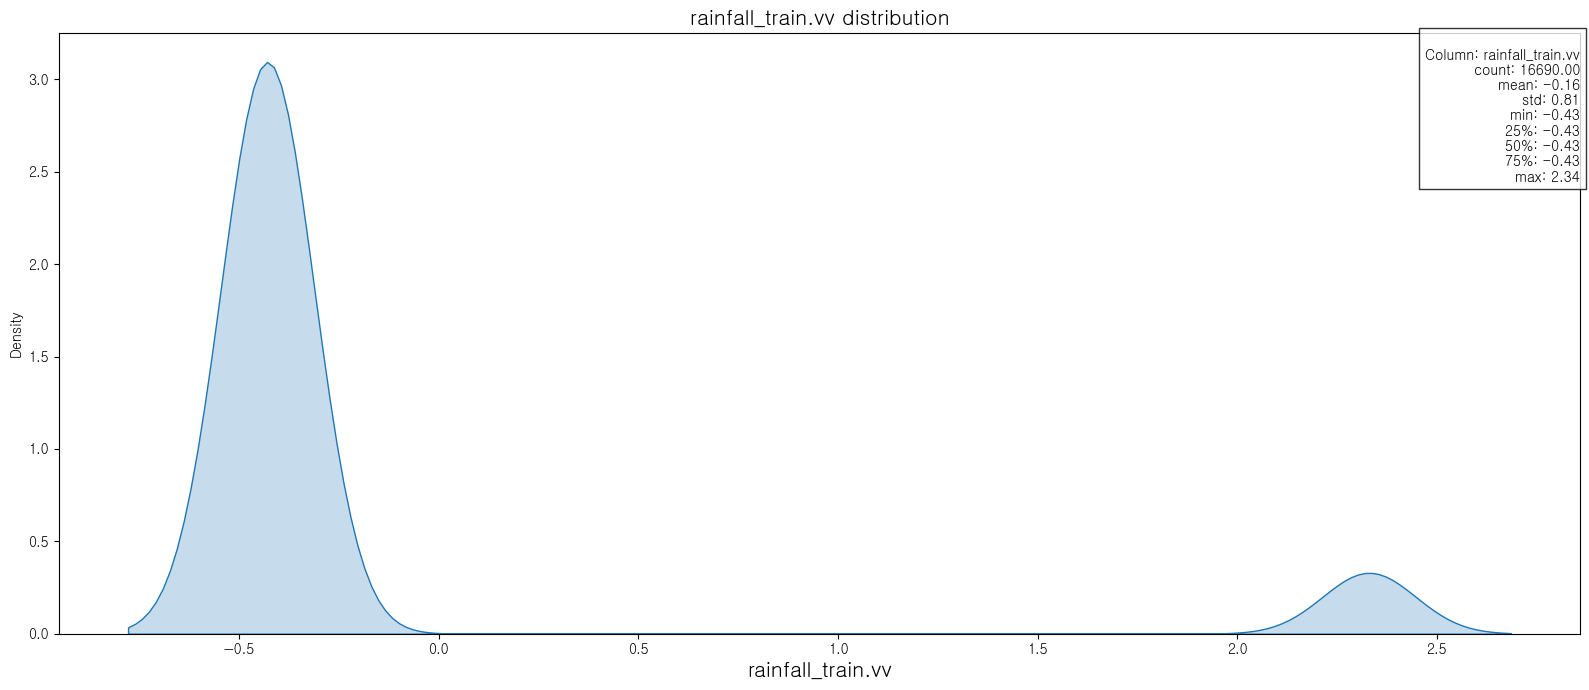

5


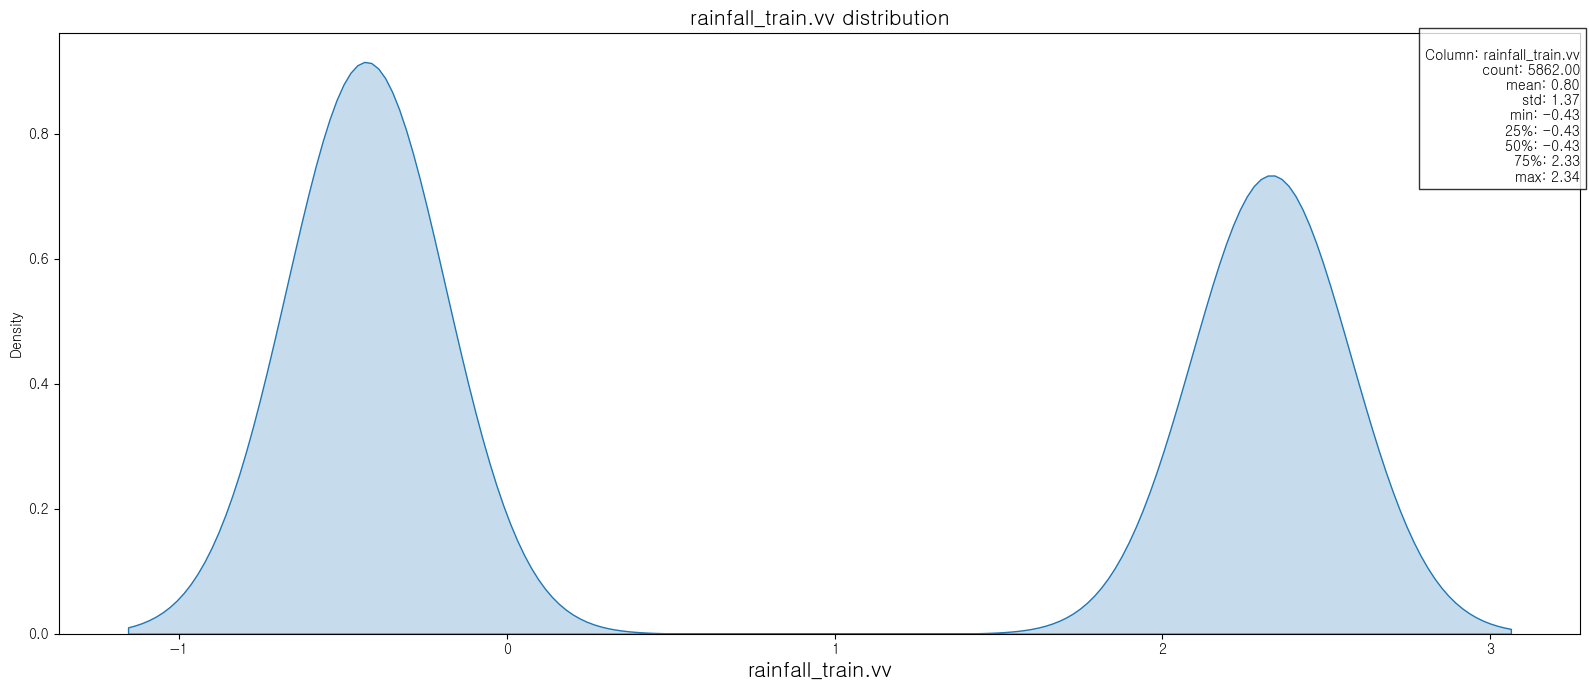

6


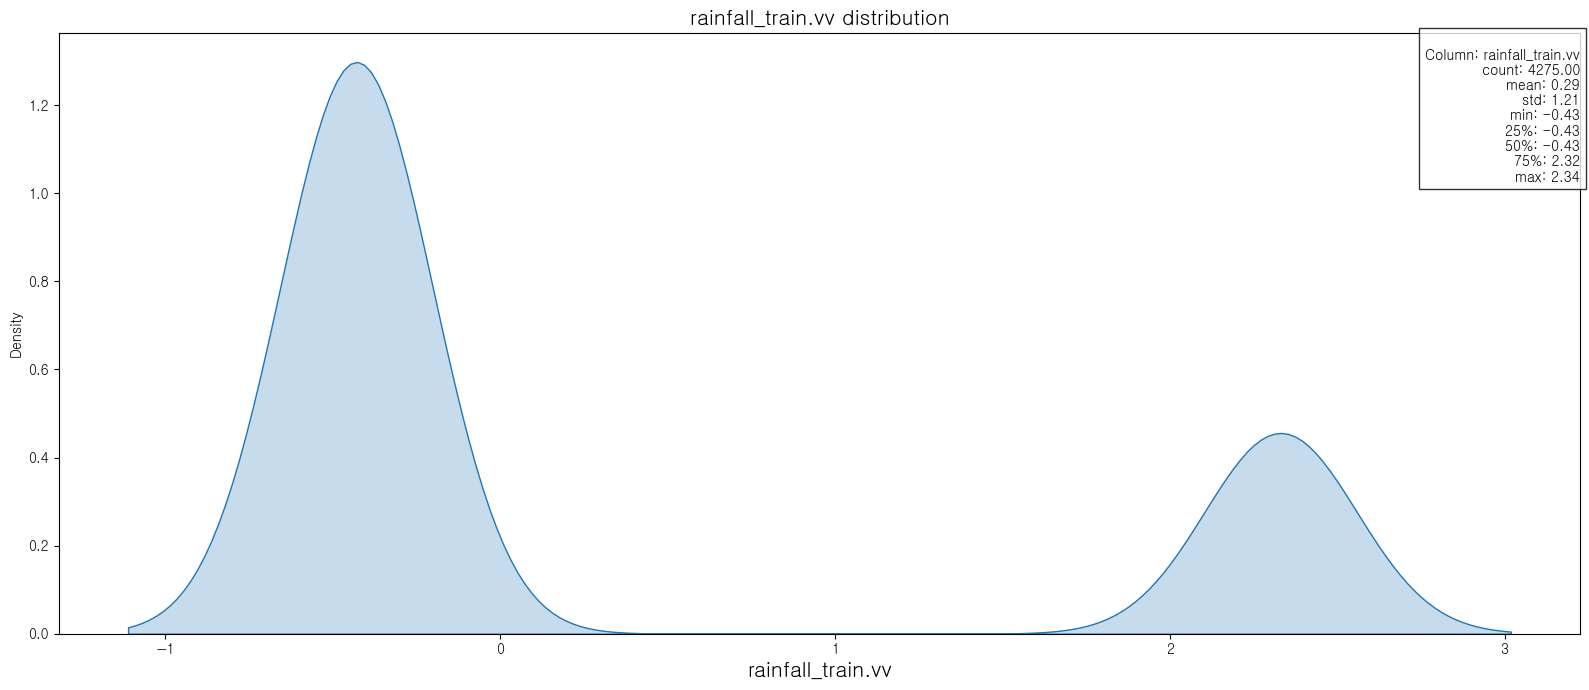

7


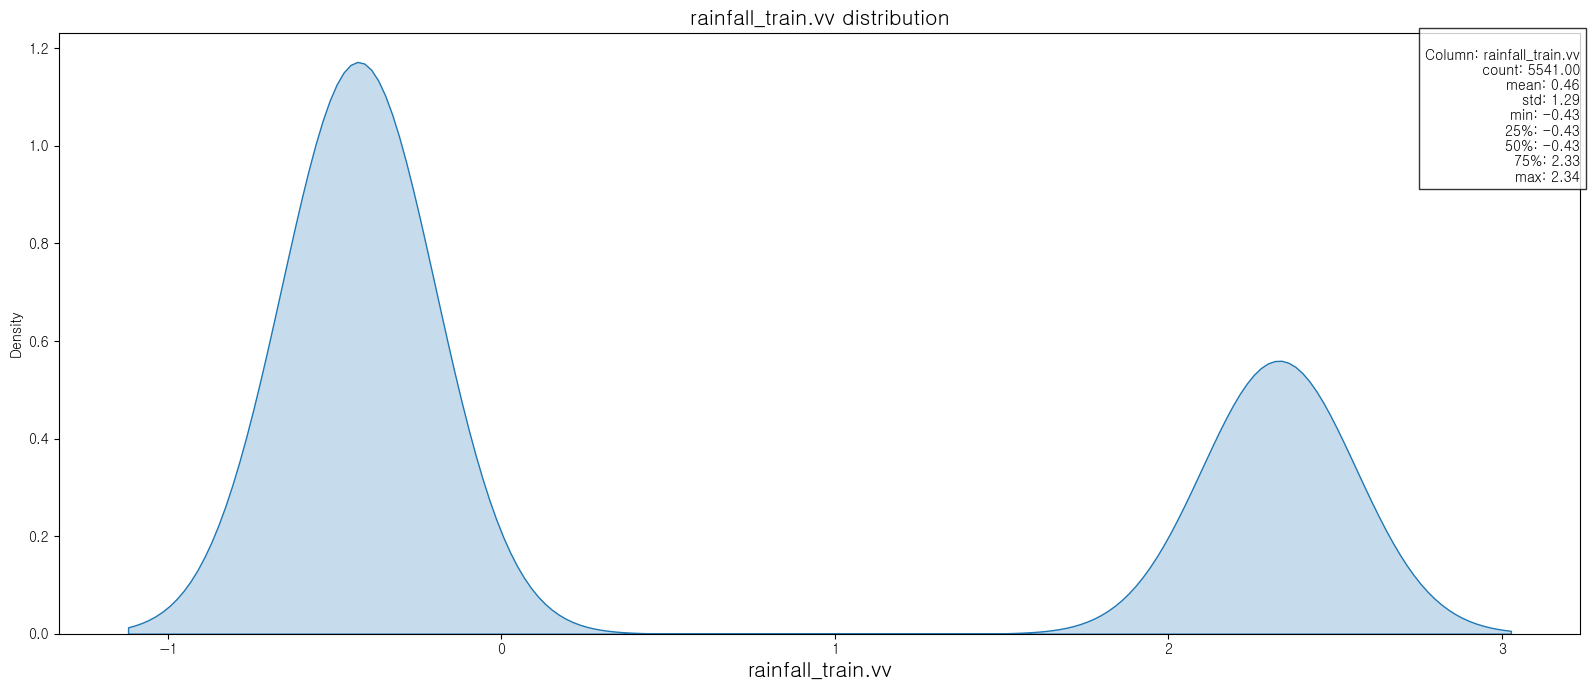

8


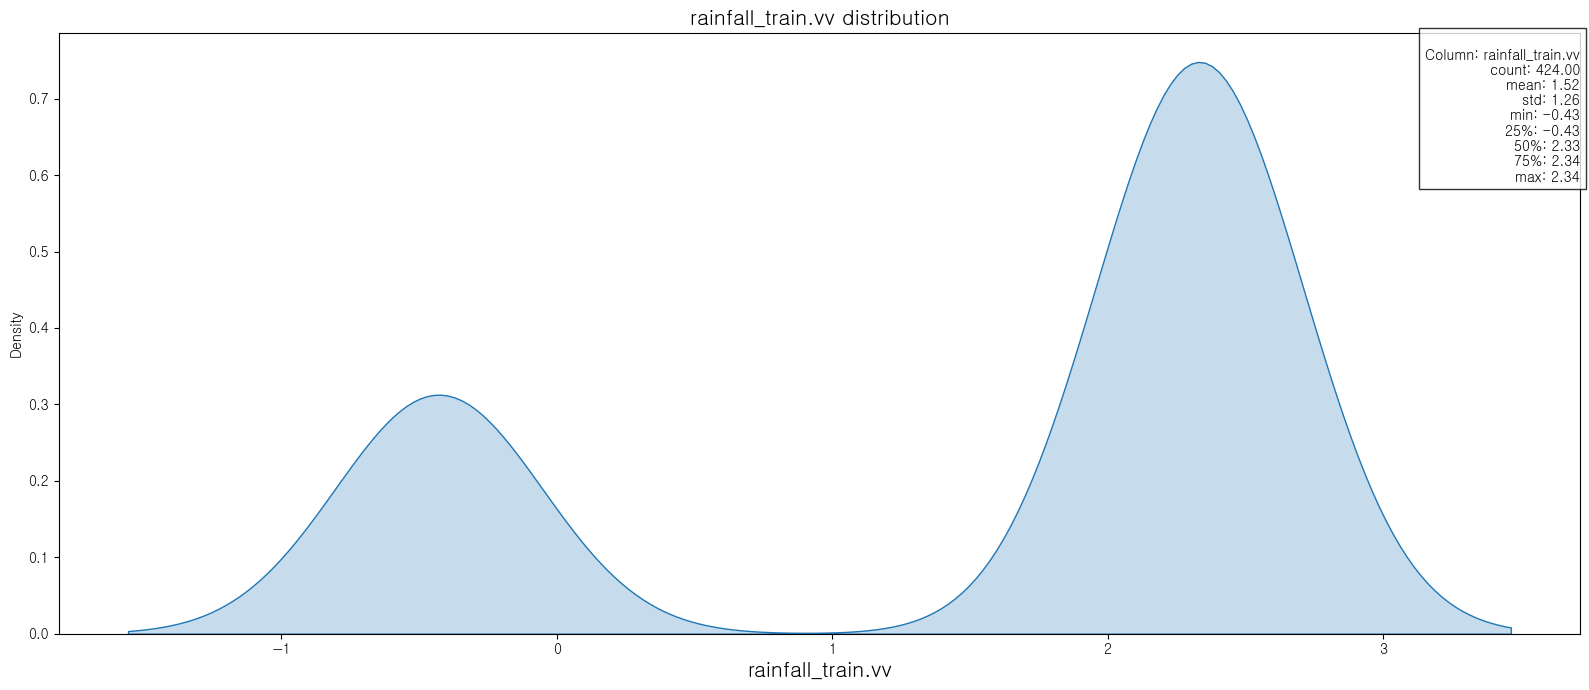

9


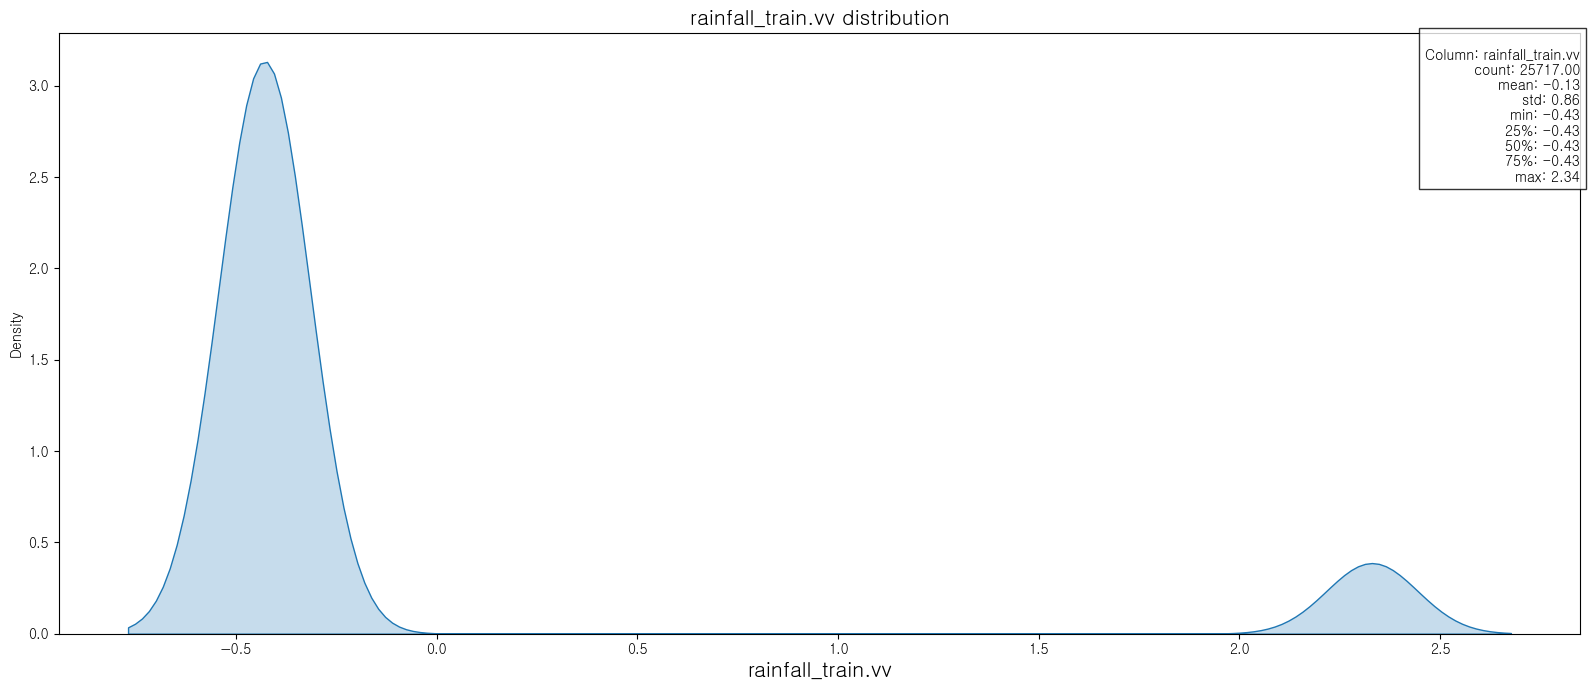

10


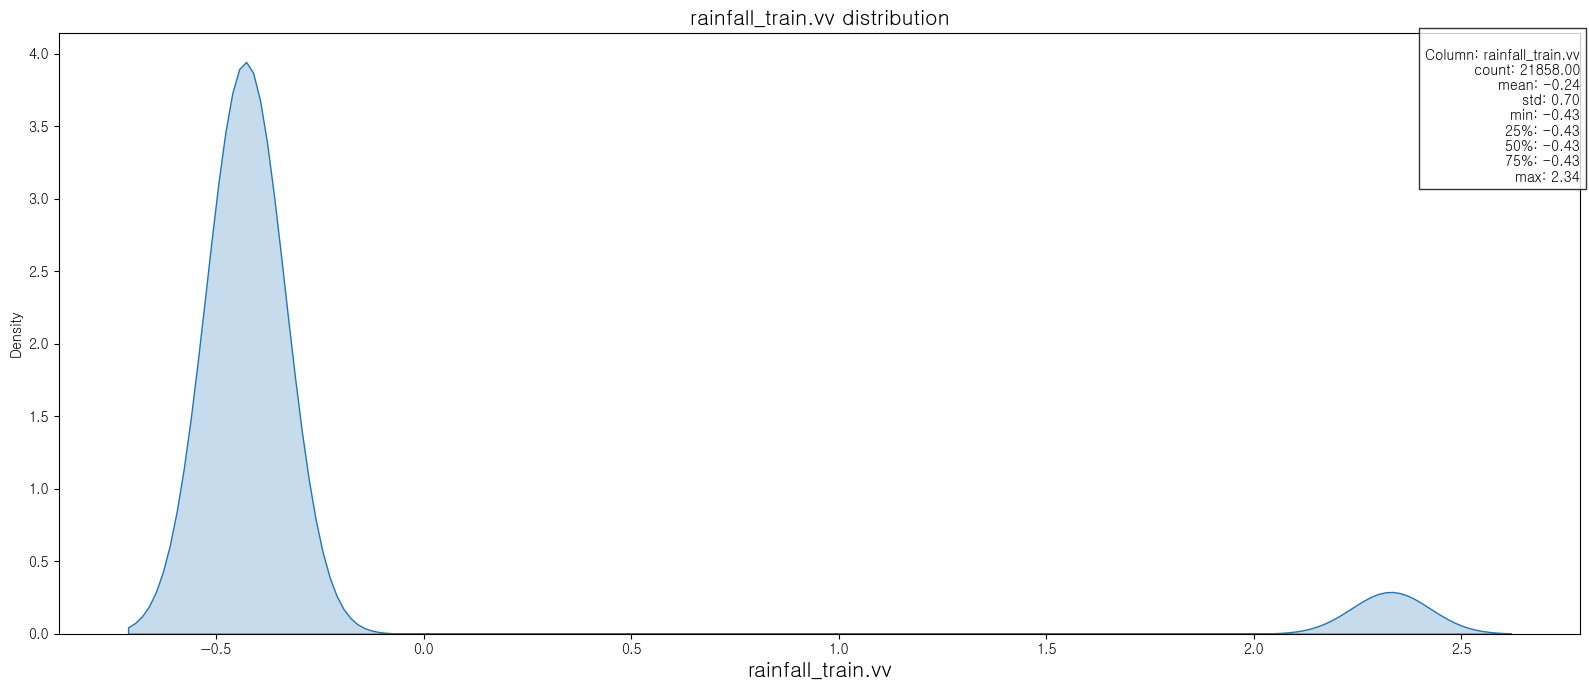

11


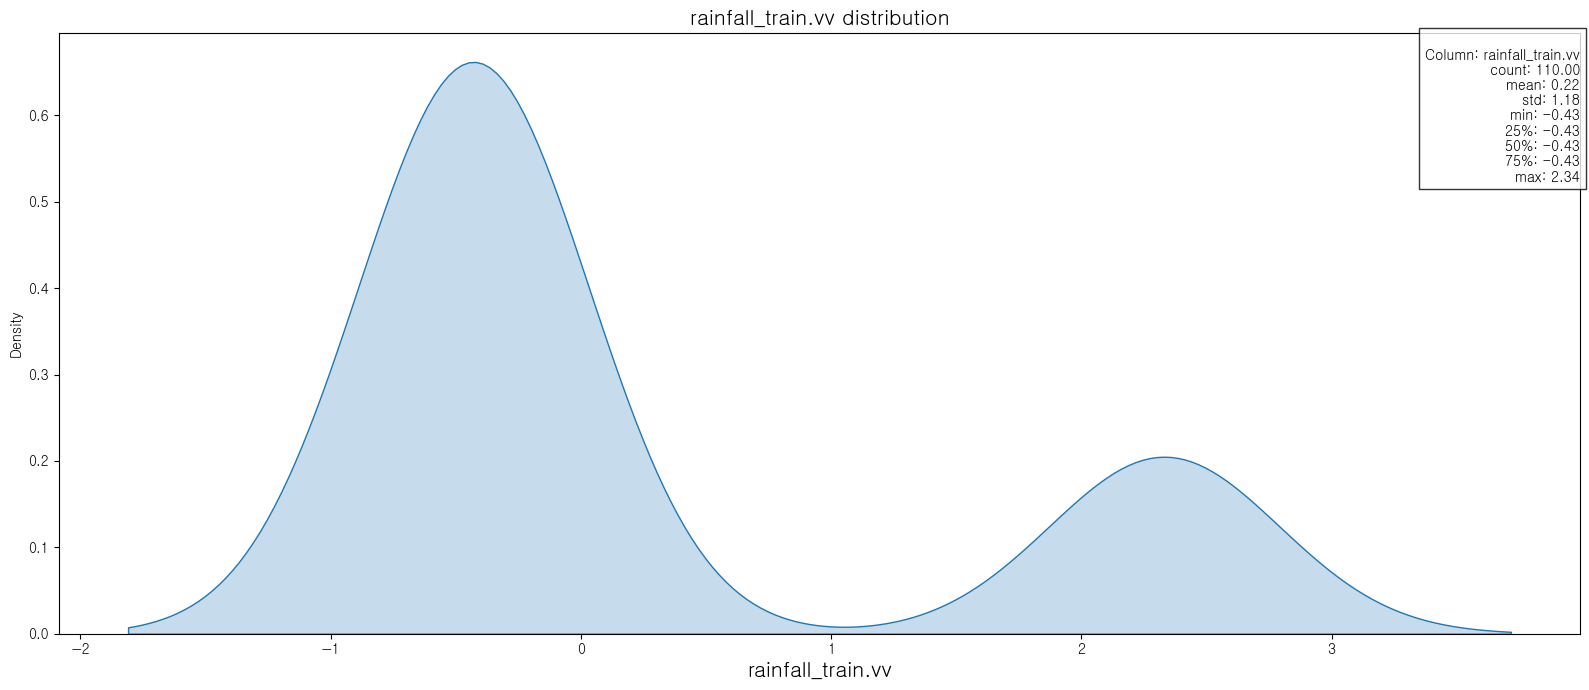

12


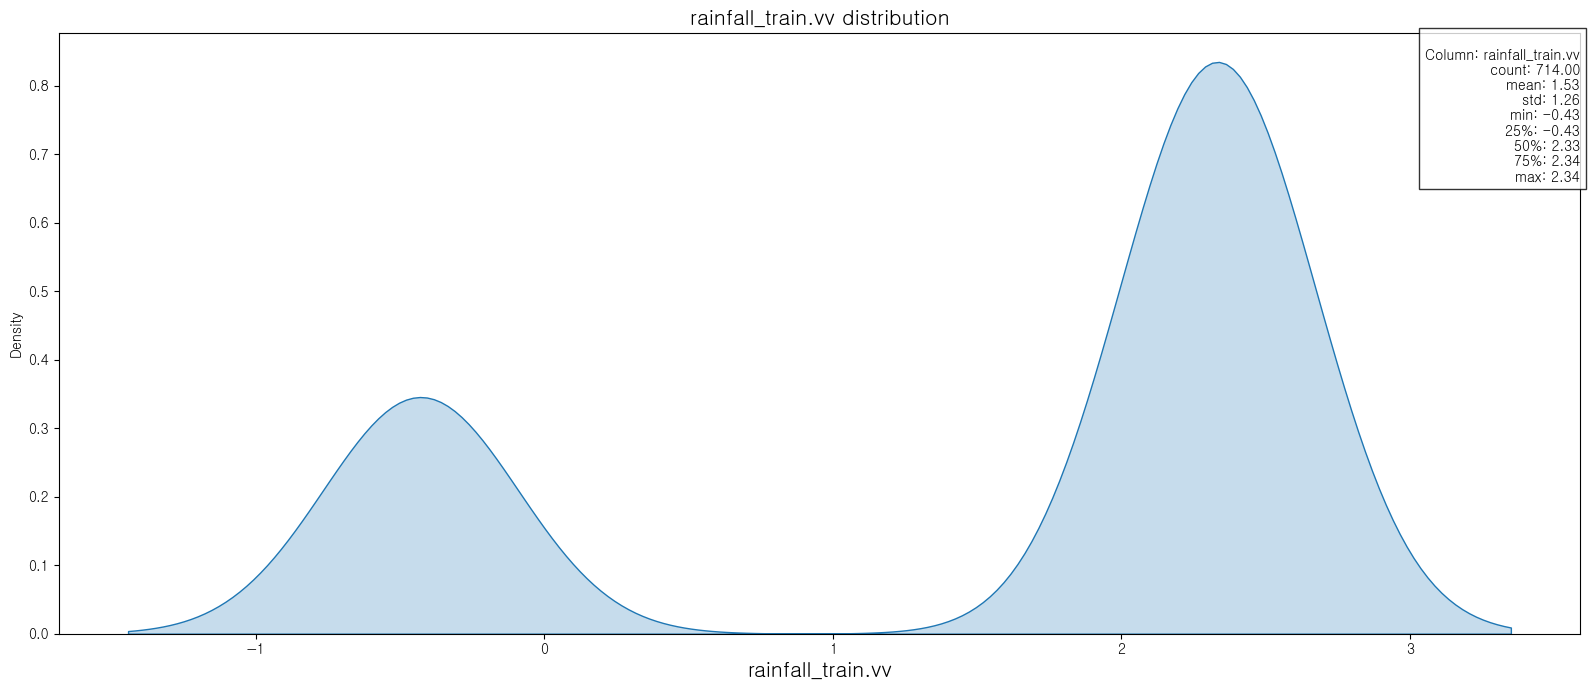

13


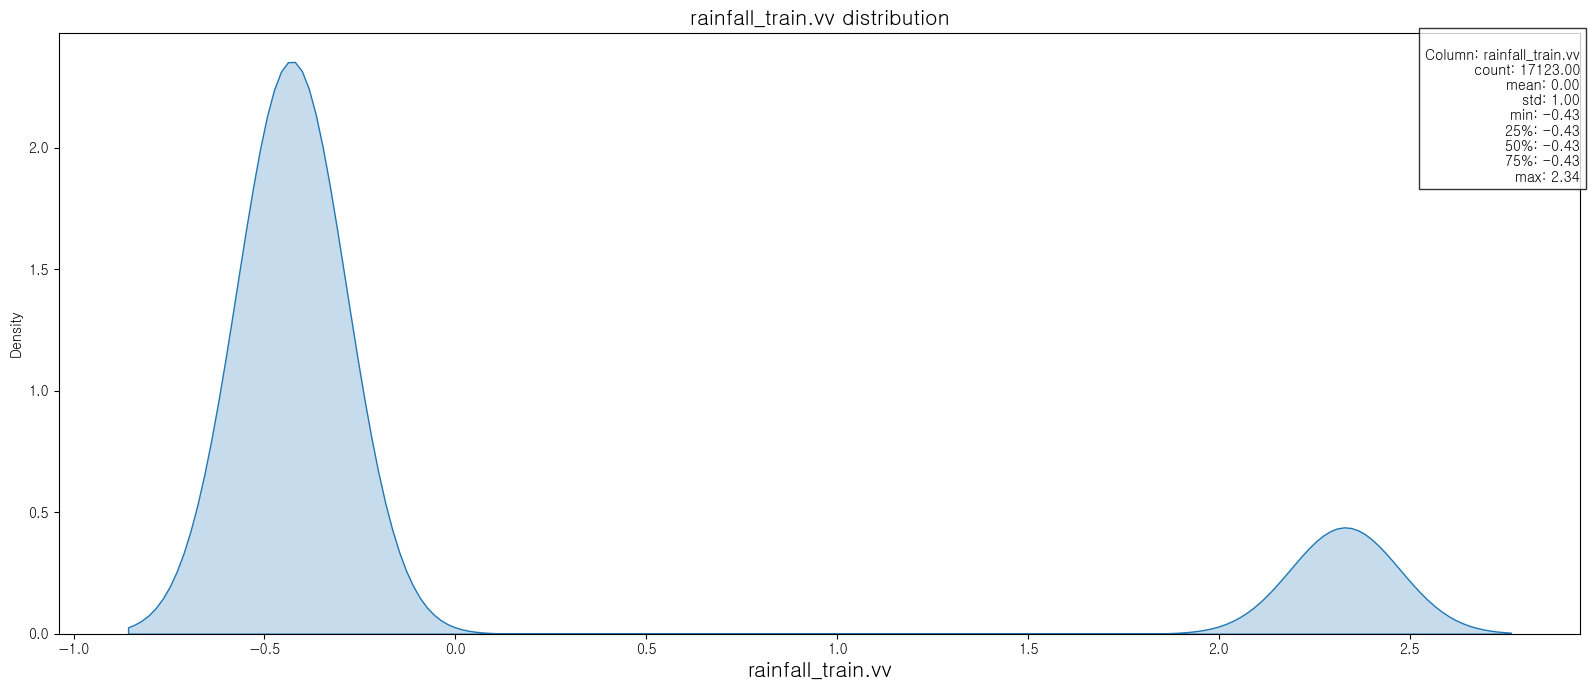

14


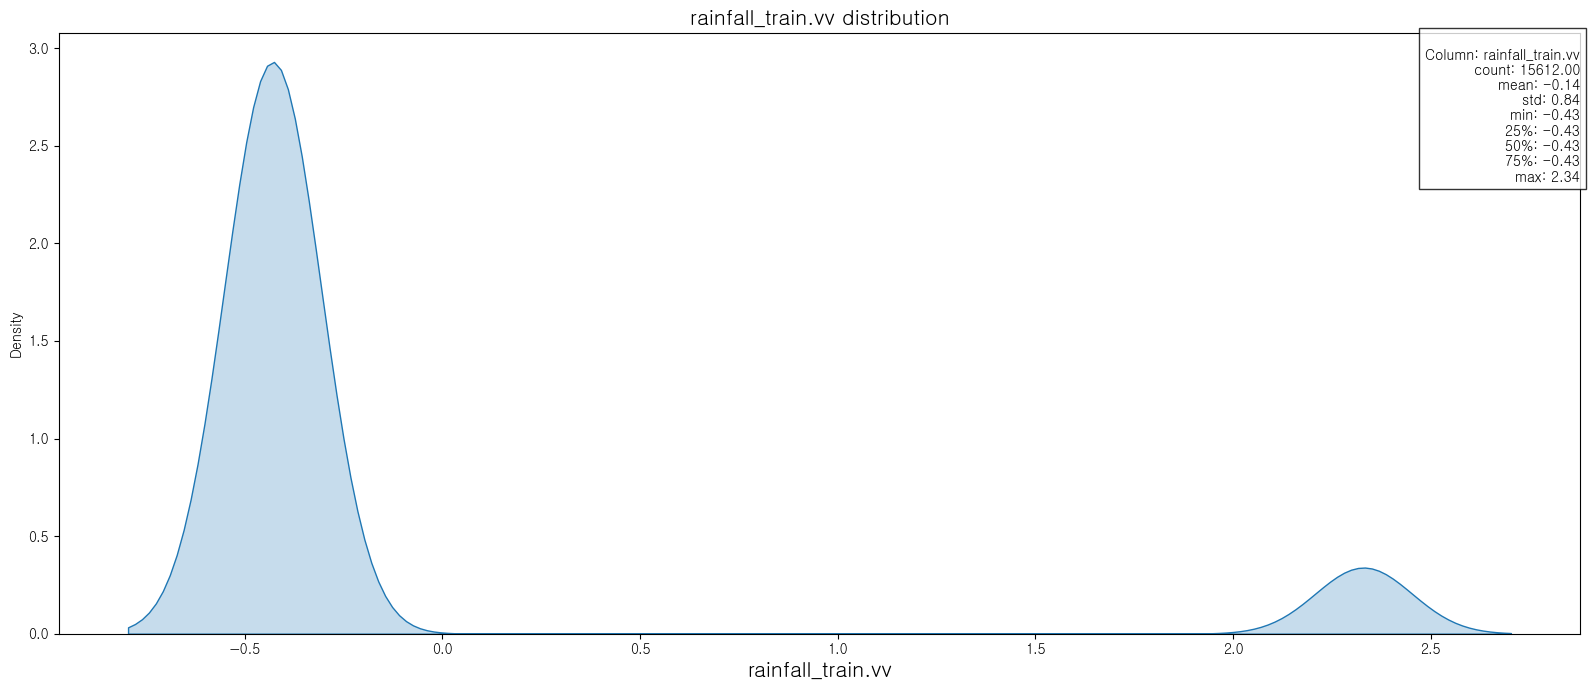

In [60]:
for i in range(15):
    print(i)
    custom_plt.plot_continuous_variable(test[test[0] == i], 'rainfall_train.vv', 'kde', False, False)